In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, mode, median, stdev
from scipy import stats as s

In [28]:
df_lrec1 = pd.read_csv("./data/lrec.temp.csv")
df_lrec2 = pd.read_csv("./data/lrec2.temp.csv")
df_lrec3 = pd.read_csv("./data/Icloud-3.lrec.temp.csv")
df_lrec4 = pd.read_csv("./data/inc-4.lrec.temp.csv")
df_pi3 = pd.read_csv("./data/pi3-02.csv")
df_pi9 = pd.read_csv("./data/pizero-09.csv")
df_mayhem2 = pd.read_csv("./data/mayhem-nc2.temp.csv")
df_mayhem4 = pd.read_csv("./data/mayhem-nc4.temp.csv")
df_thread = pd.read_csv("./data/temp_thread.csv")
df_thread2 = pd.read_csv("./data/temp_thread2.csv")

In [6]:
df_lrec2.head()

seq_no       epoch                     timestamp         ip   temp
0       1  1537317302  Tue Sep 18 17:35:02 PDT 2018  10.0.1.15  118.4
1       2  1537317602  Tue Sep 18 17:40:02 PDT 2018  10.0.1.15  118.4
2       3  1537317901  Tue Sep 18 17:45:01 PDT 2018  10.0.1.15  118.4
3       4  1537318202  Tue Sep 18 17:50:02 PDT 2018  10.0.1.15  118.4
4       5  1537318502  Tue Sep 18 17:55:02 PDT 2018  10.0.1.15  118.4

In [4]:
def plot_ts(df):
    plt.figure(figsize=[50, 10])

    rolling_mean_1 = df['temp'].ewm(span=12, adjust=False).mean()
    rolling_mean_2 = df['temp'].ewm(span=24, adjust=False).mean()
    
    plt.plot(df['epoch'], df['temp'], label="temp")
    plt.plot(df['epoch'], rolling_mean_1, label="1 hr EMA", color = 'green')
    plt.plot(df['epoch'], rolling_mean_2, label="2 hr EMA", color = 'magenta')
    plt.legend(loc='upper left')
    plt.show()

In [5]:
def metrics(df):
    print ("The mean temperature is {0} ".format(df['temp'].mean()))
    print ("The median temperature is {0} ".format(median(df['temp'])))
    print ("The mode temperature is {0} ".format(float(s.mode(df['temp'])[0])))
    print ("The stdev temperature is {0} ".format(stdev(df['temp'])))
    print ("The max temperature is {0} ".format(max(df['temp'])))
    print ("The min temperature is {0} ".format(min(df['temp'])))

In [7]:
def analyze(df):
    # CPU Safe temperature [95F - 122F]
    print ("Time slots CPU is under safe temperature {} mins in {} mins".format(
        len(df[df['temp'] <= 122]), len(df)))
    metrics(df)
    plot_ts(df)

In [22]:
metrics(df_lrec1)

The mean temperature is 126.54696589050563 
The median temperature is 123.8 
The mode temperature is 116.6 
The stdev temperature is 14.297690881161902 
The max temperature is 212.0 
The min temperature is 84.2 


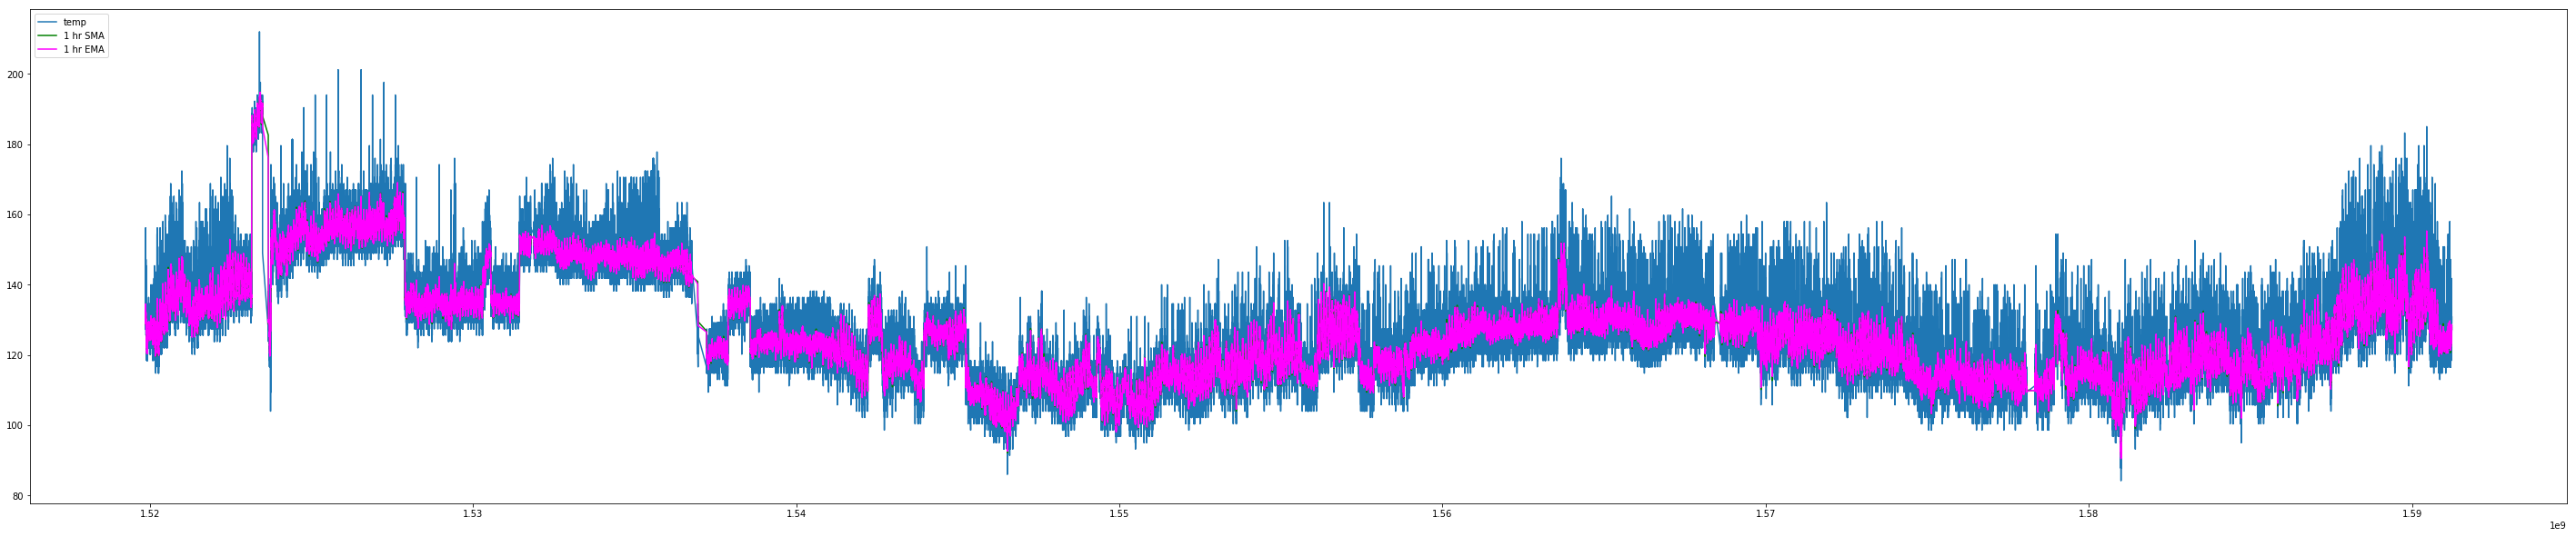

In [251]:
plot_ts(df_lrec1)

In [23]:
metrics(df_lrec2)

The mean temperature is 96.13516476141473 
The median temperature is 96.8 
The mode temperature is 100.4 
The stdev temperature is 9.67738721274418 
The max temperature is 123.8 
The min temperature is 0.0 


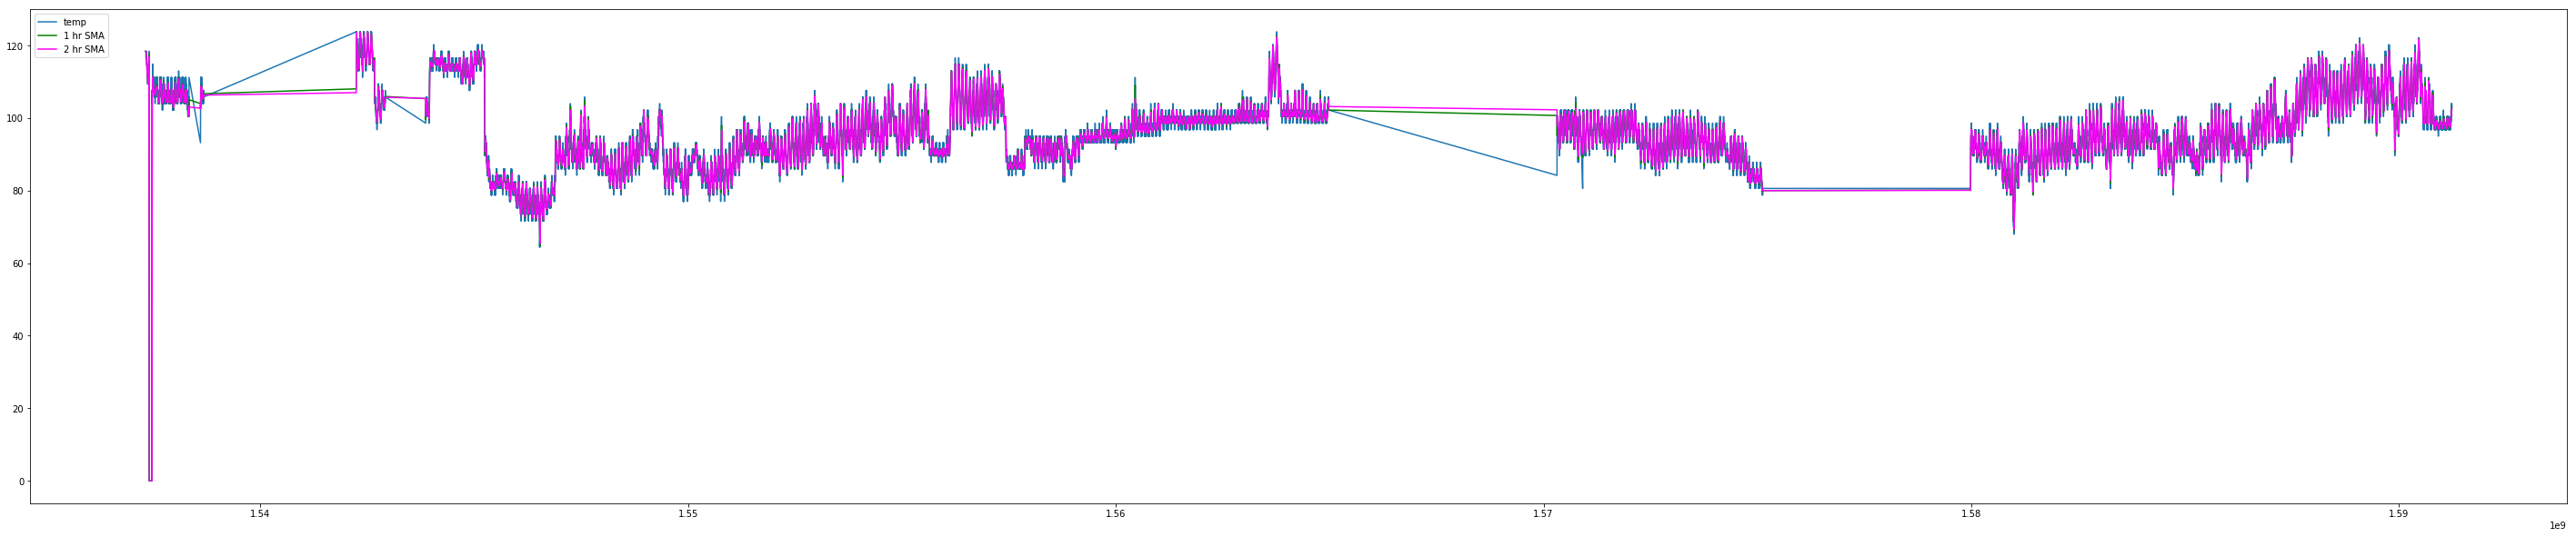

In [236]:
plot_ts(df_lrec2)

In [24]:
metrics(df_lrec3)

The mean temperature is 141.94736416885476 
The median temperature is 141.8 
The mode temperature is 140.0 
The stdev temperature is 3.9560413132392758 
The max temperature is 161.6 
The min temperature is 109.4 


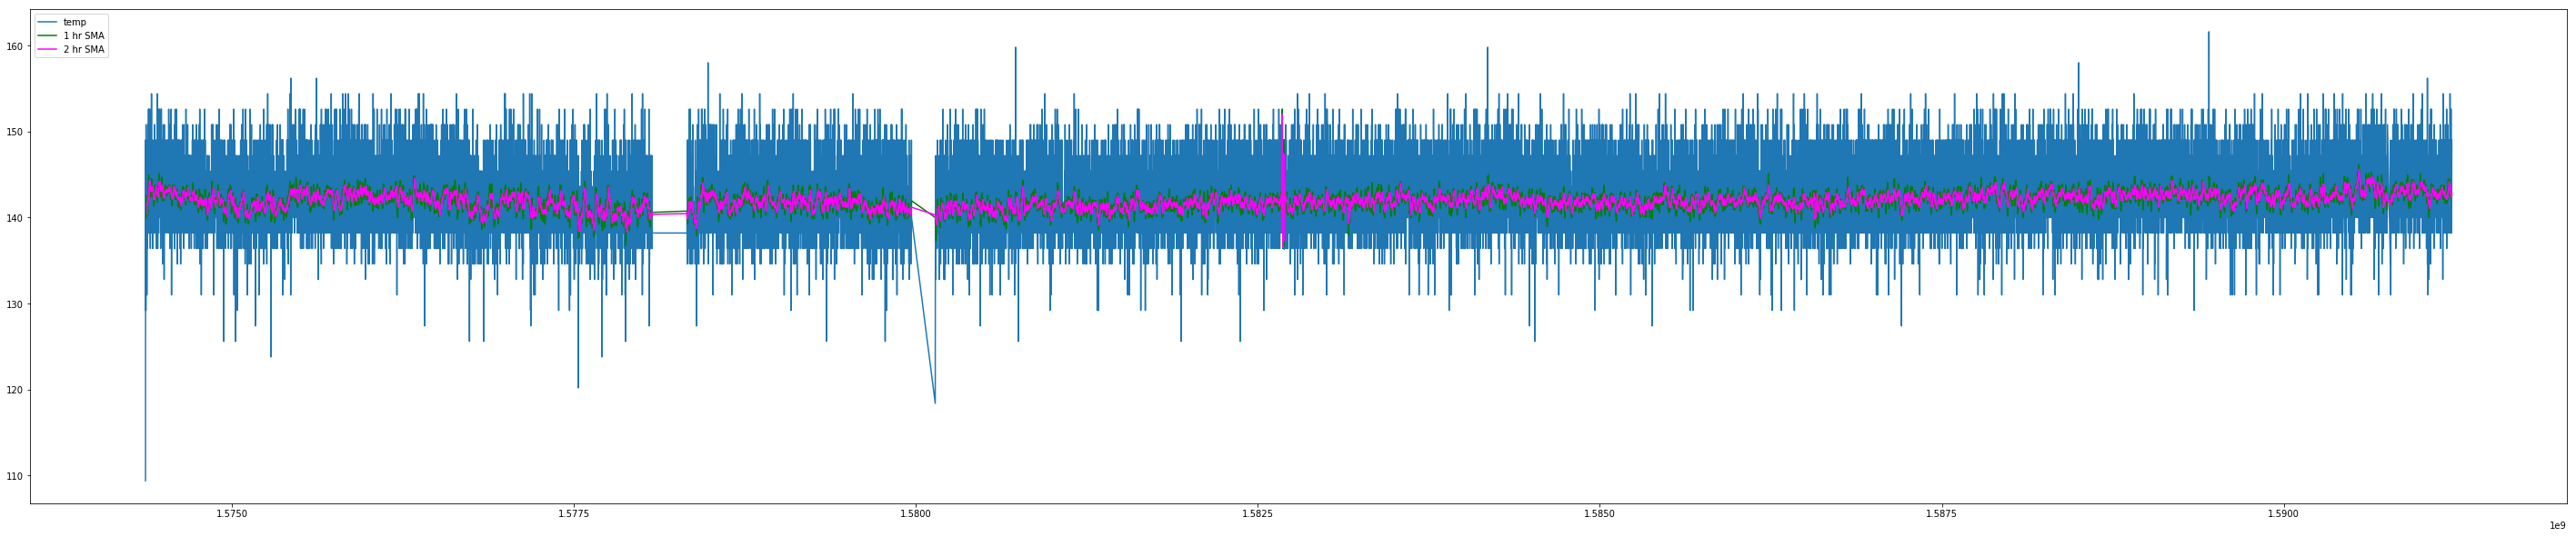

In [237]:
plot_ts(df_lrec3)

In [25]:
metrics(df_lrec4)

The mean temperature is 140.3773388941208 
The median temperature is 141.8 
The mode temperature is 140.0 
The stdev temperature is 6.033081420153038 
The max temperature is 167.0 
The min temperature is 82.04 


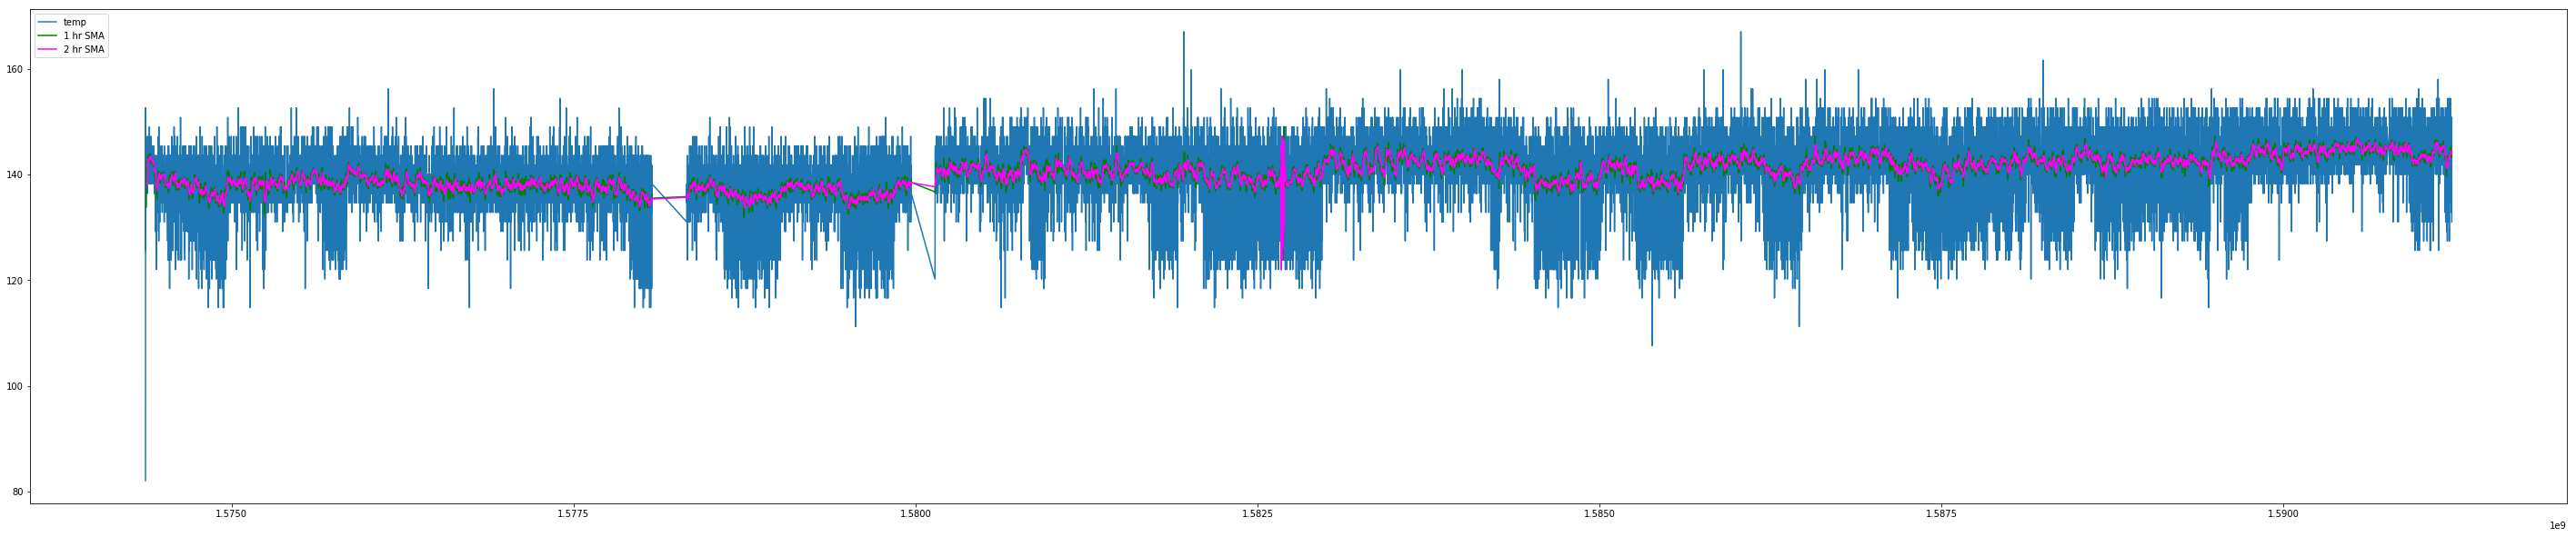

In [238]:
plot_ts(df_lrec4)

In [26]:
metrics(df_pi3)

The mean temperature is 115.09527768051497 
The median temperature is 113.151 
The mode temperature is 101.53 
The stdev temperature is 16.806805098852877 
The max temperature is 181.908 
The min temperature is 20.0 


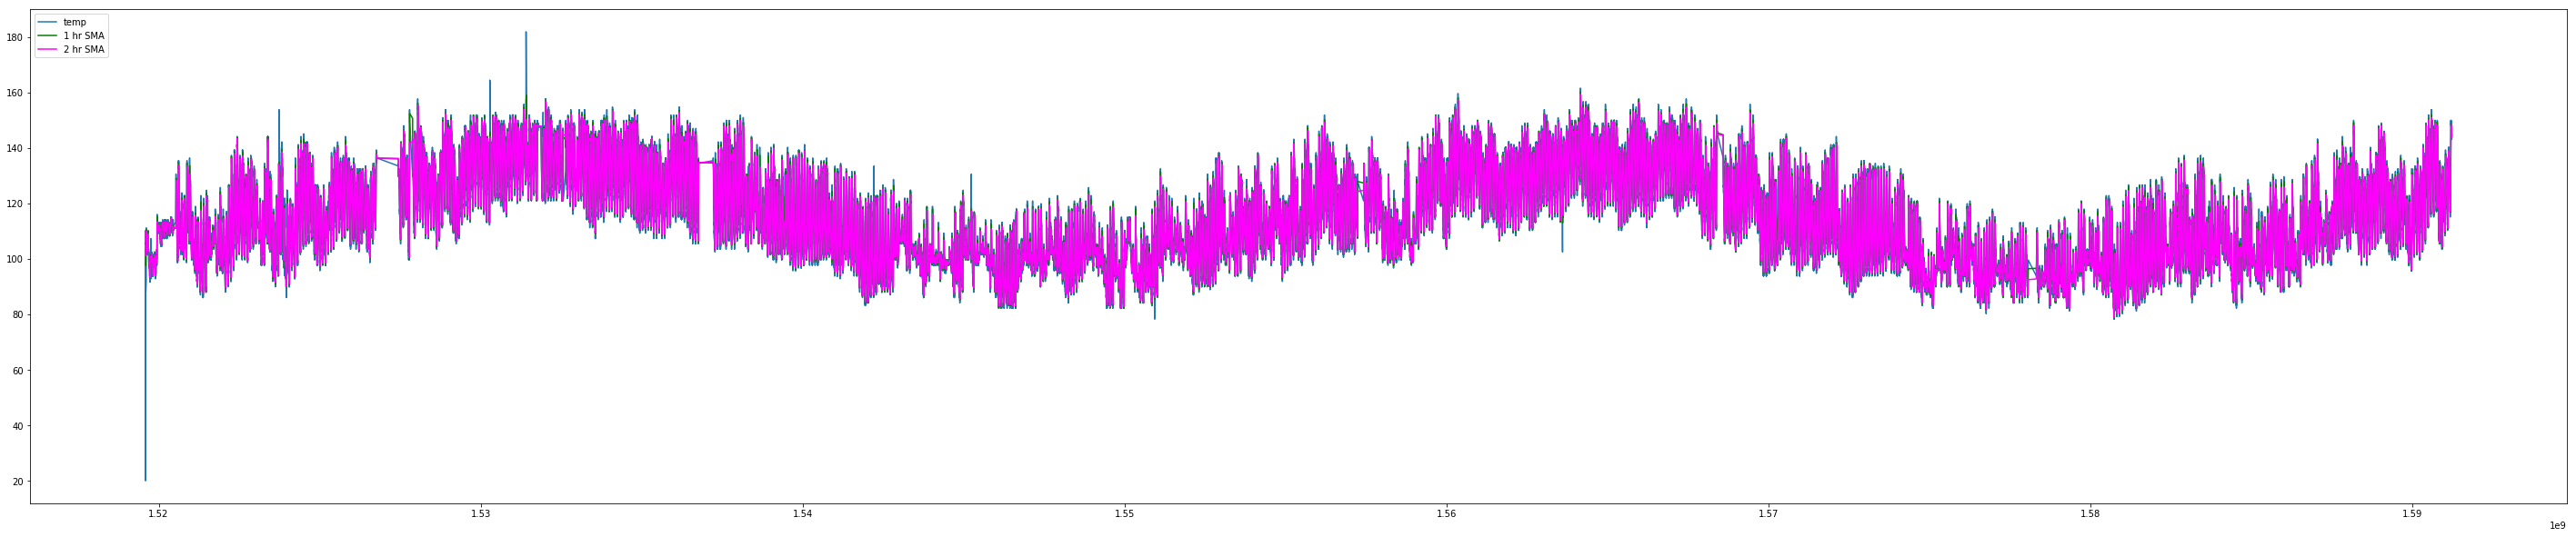

In [239]:
plot_ts(df_pi3)

In [27]:
metrics(df_pi9)

The mean temperature is 99.59187572892837 
The median temperature is 96.404 
The mode temperature is 88.6568 
The stdev temperature is 19.60419377834981 
The max temperature is 154.508 
The min temperature is 10.0 


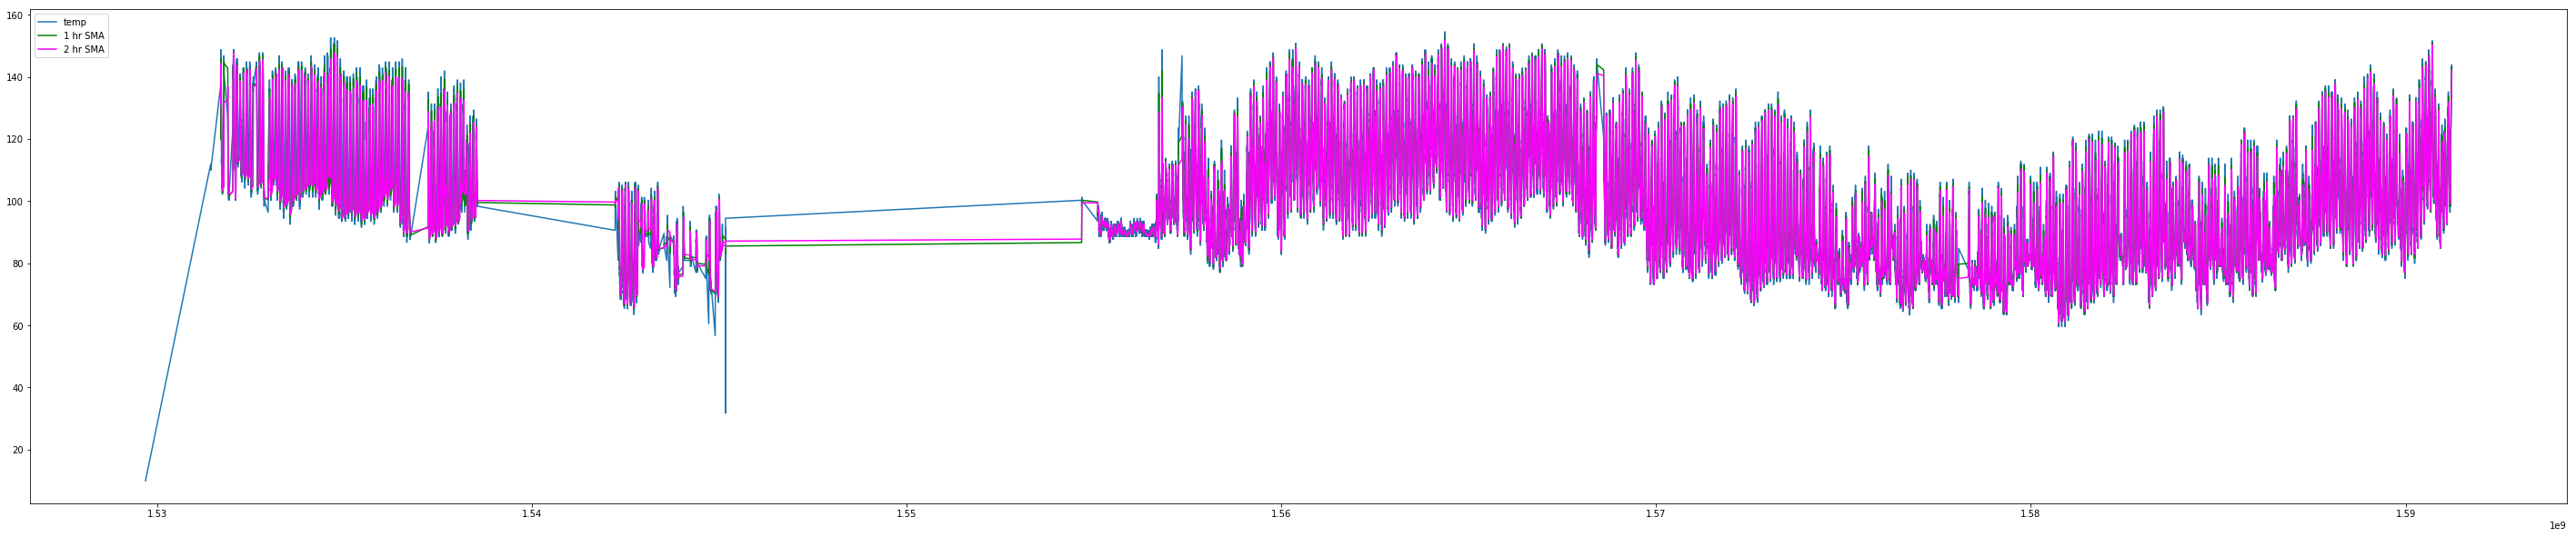

In [240]:
plot_ts(df_pi9)

### Dysfunctional Period (Reading zero)

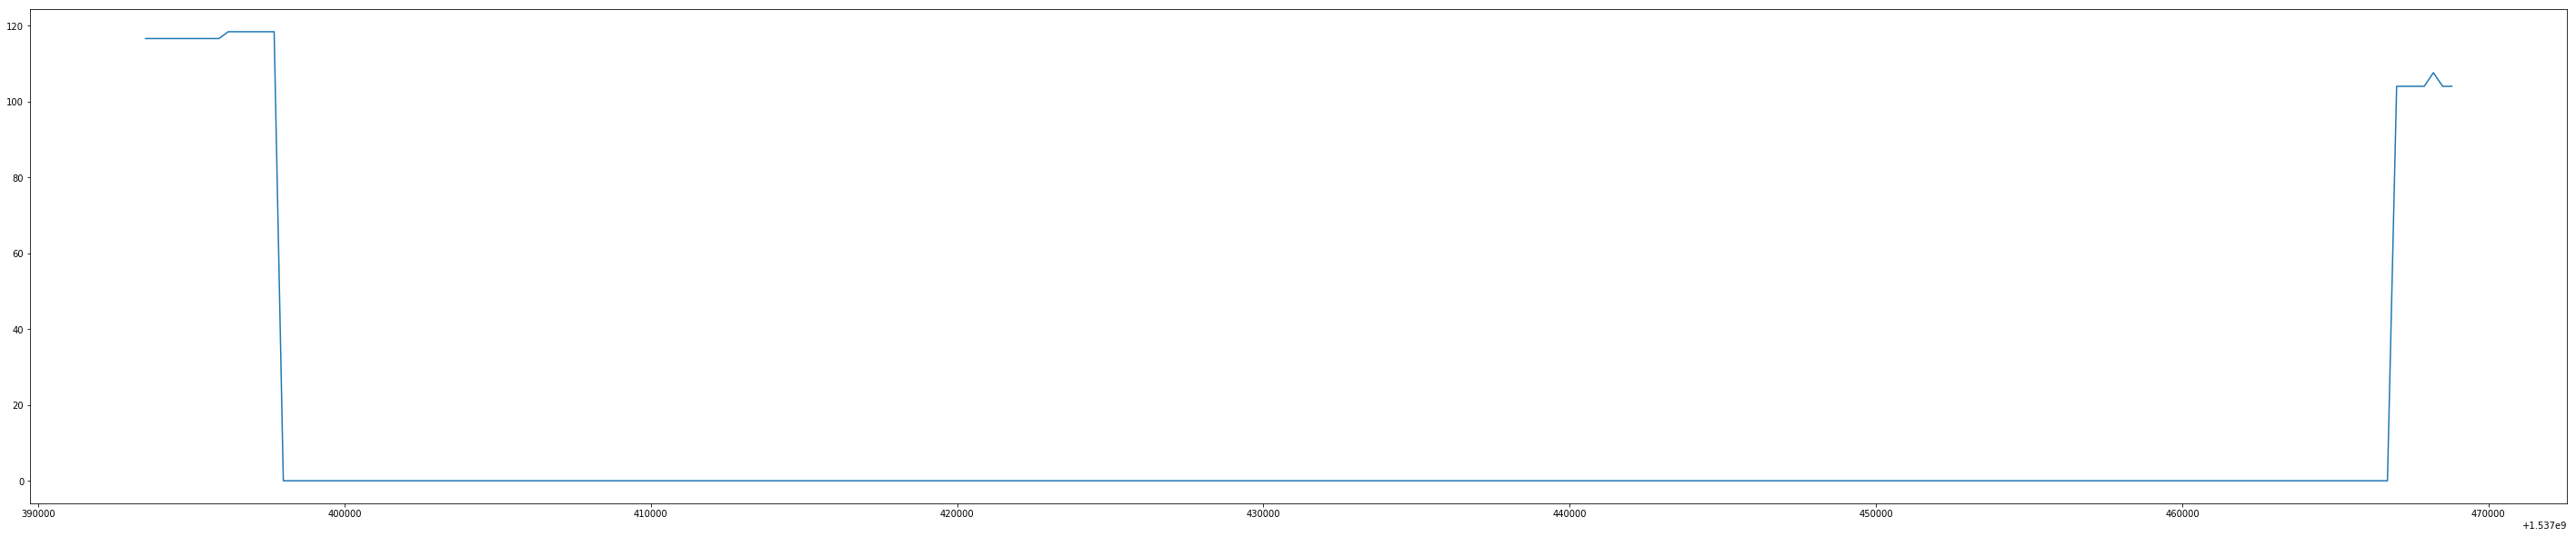

In [34]:
plot_ts(df_lrec2[250:500])

#### Gap at 3583 (Thu Oct 4 10:55:01 PDT - Wed Nov 14 16:48:25 PST 2018)
#### Gap at 5851 (Thu Nov 22 13:45:01 PST 2018 - Mon Dec 3 11:40:01 PST 2018)

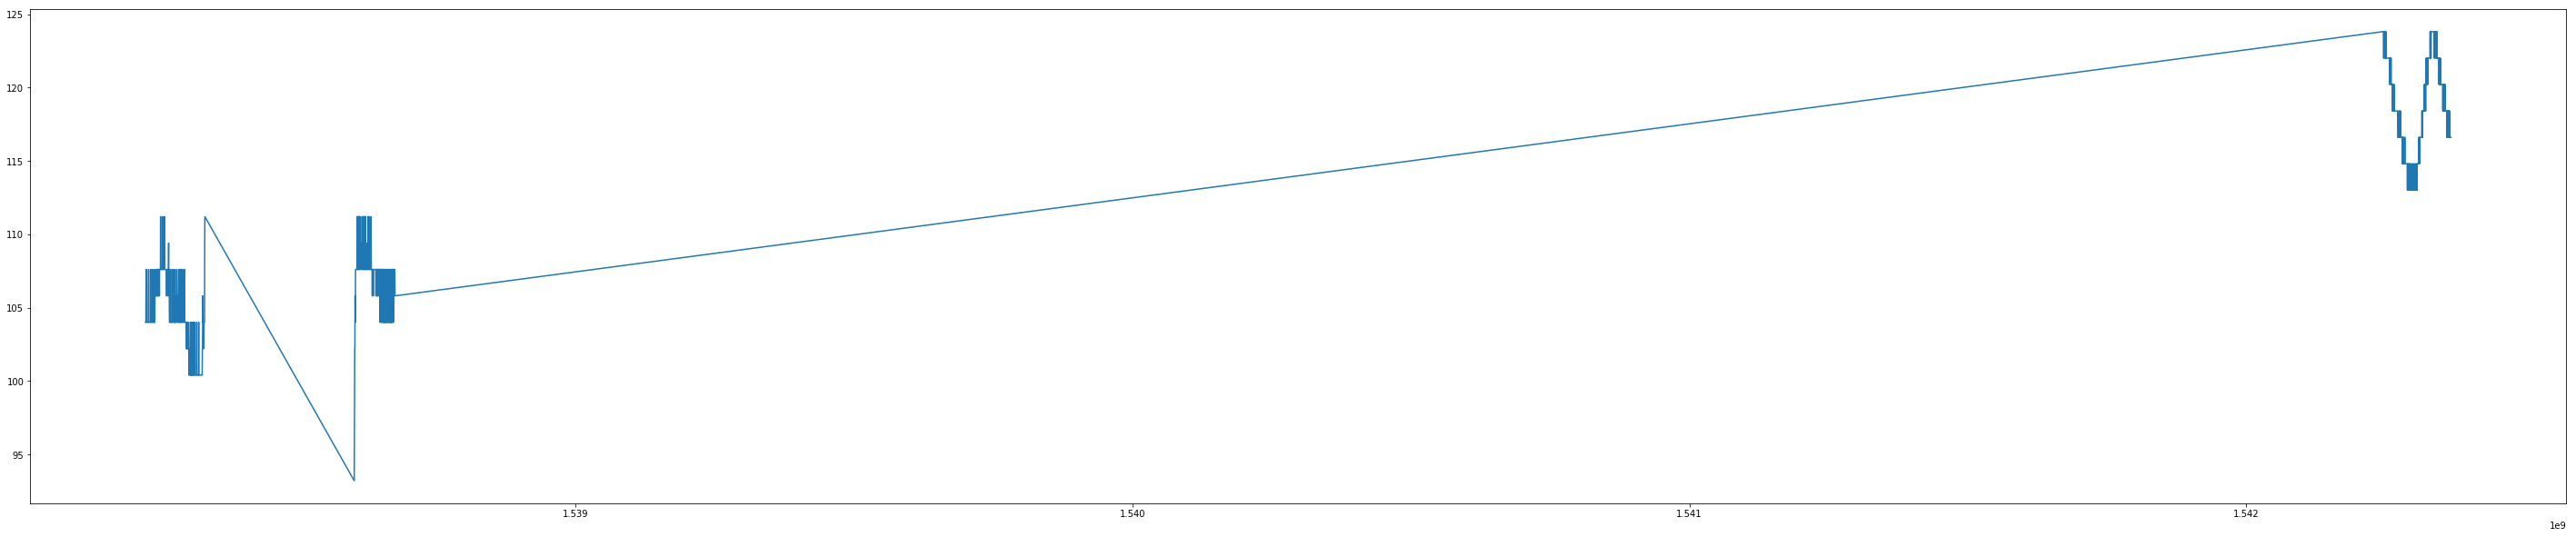

In [47]:
plot_ts(df_lrec2[3000:4000])


#### From 6140 Step-up (Tue Dec 4 11:40:01 PST 2018)

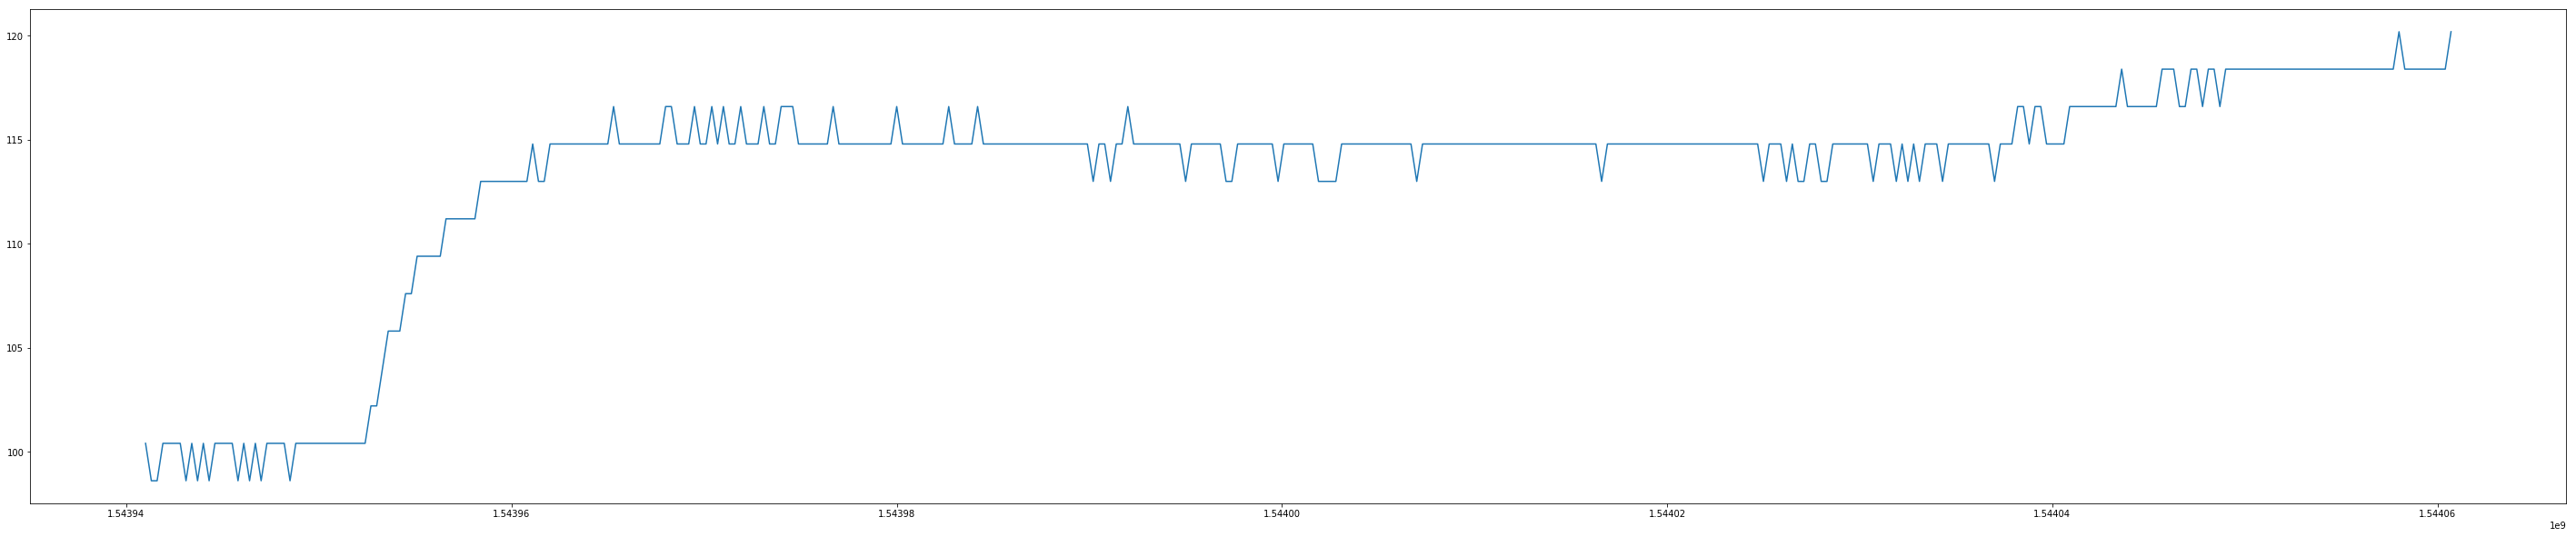

In [43]:
plot_ts(df_lrec2[6100:6500])

#### Degradation at 10410 (Wed Dec 19 10:05:01 PST 2018) 111F to 90F (Heater off?)

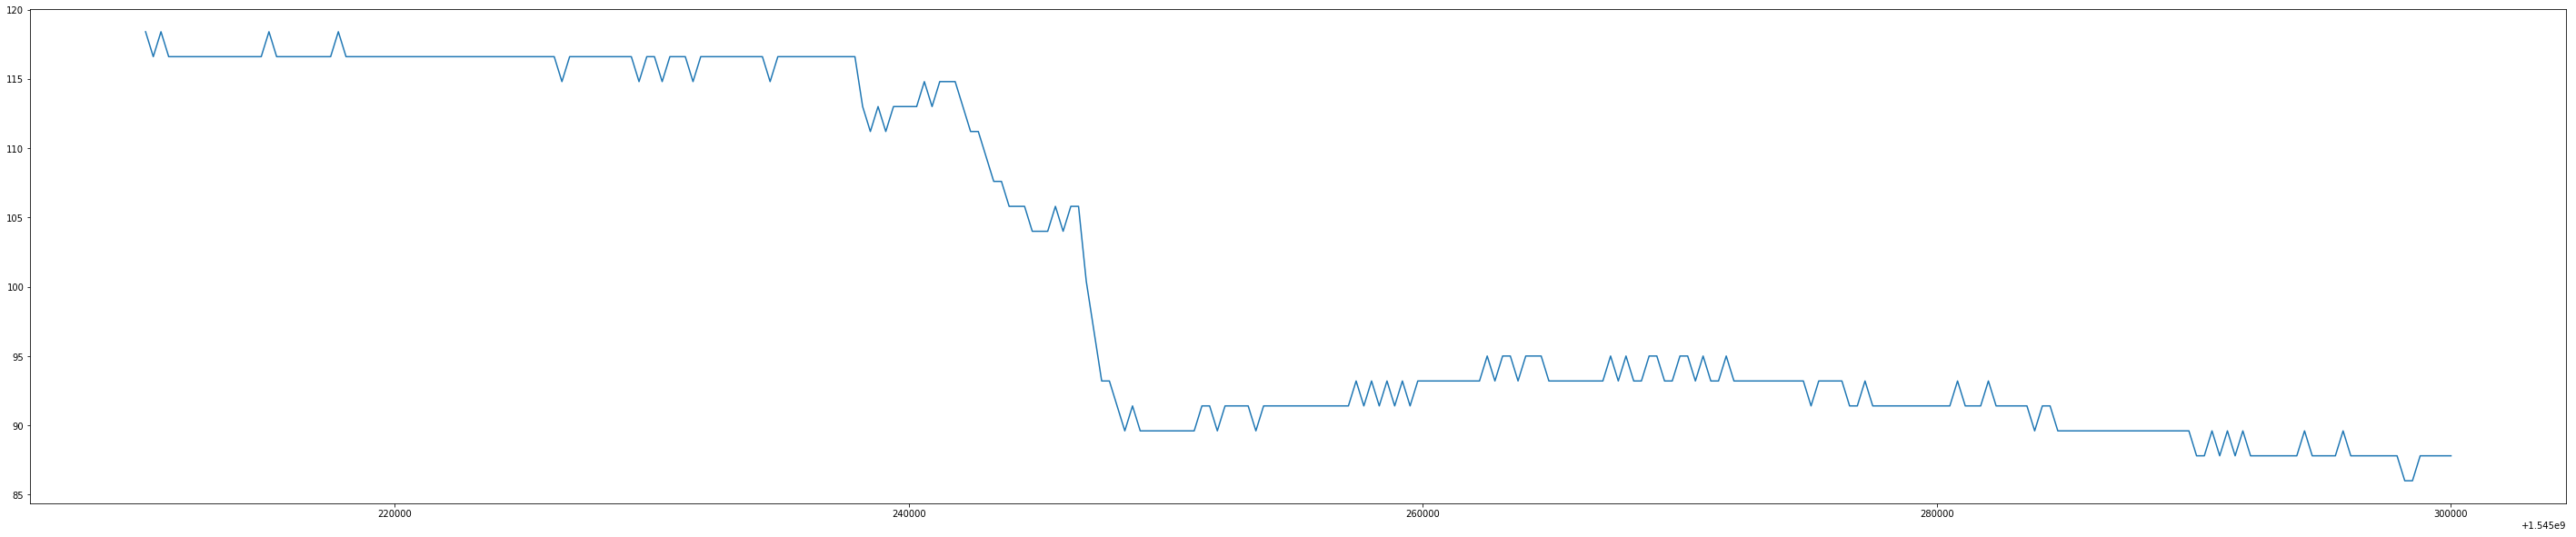

In [63]:
plot_ts(df_lrec2[10300:10600])

### 2019 Winter (12/19 - 3/21)

The mean temperature is 87.71991726212862 
The median temperature is 87.8 
The mode temperature is 89.6 
The stdev temperature is 6.470919658498862 


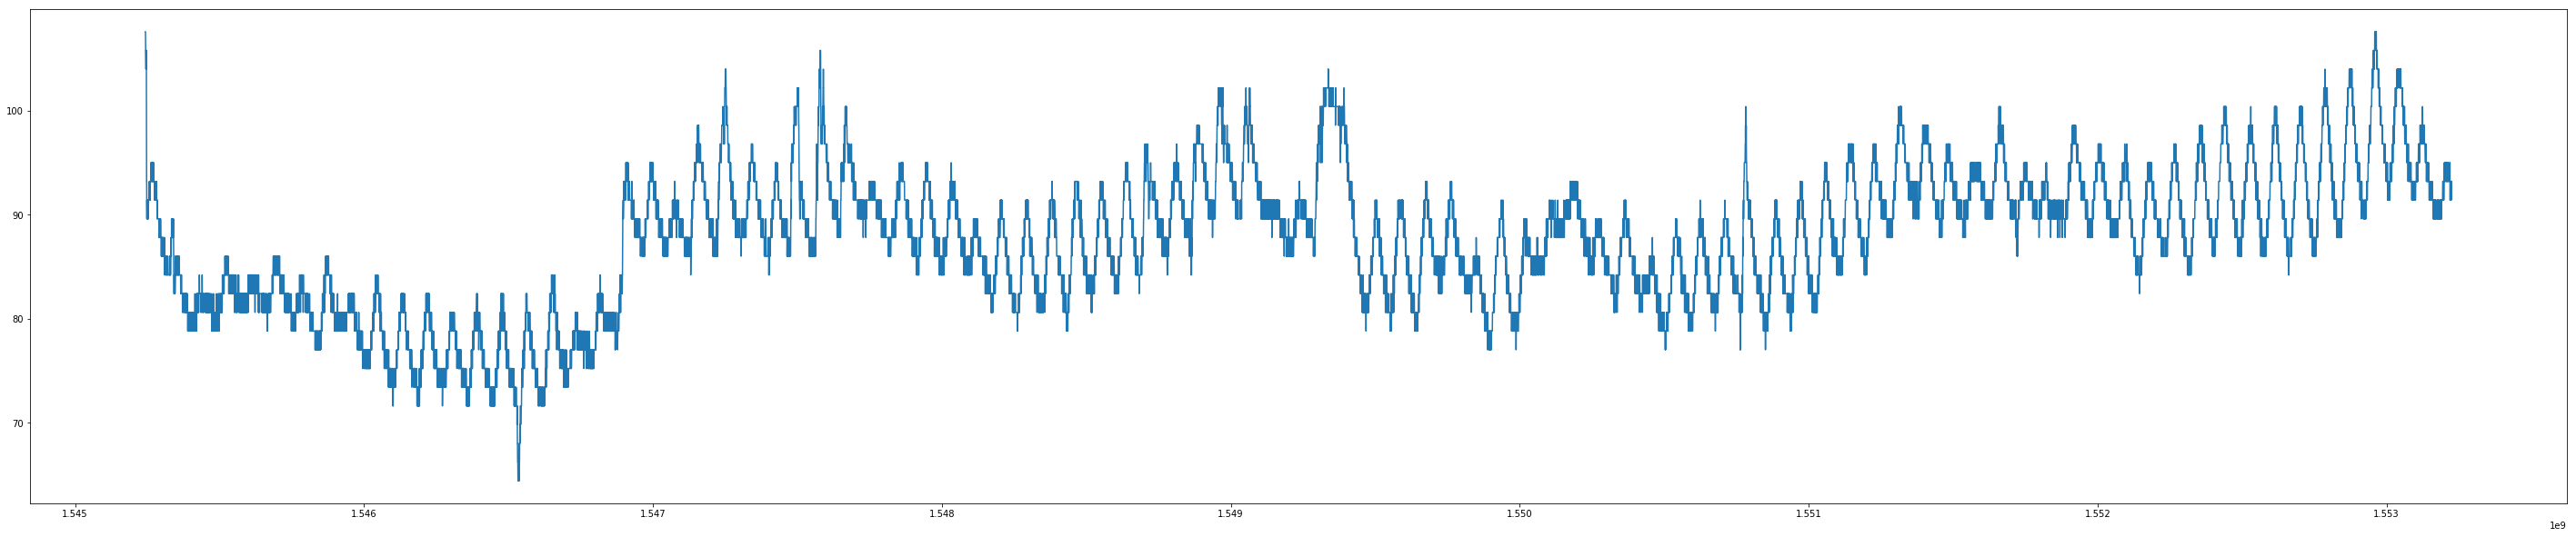

In [124]:
df_lrec2_winter = df_lrec2[10410:37000]
plot_ts(df_lrec2_winter)
metrics(df_lrec2_winter)

#### AC is offically on from 50924 (Thu May 9 12:40:01 PDT 2019)
#### 2019 Spring (3/21 - 6/23)

The mean temperature is 96.28541573033708 
The median temperature is 95.0 
The mode temperature is 95.0 
The stdev temperature is 5.996351440967698 


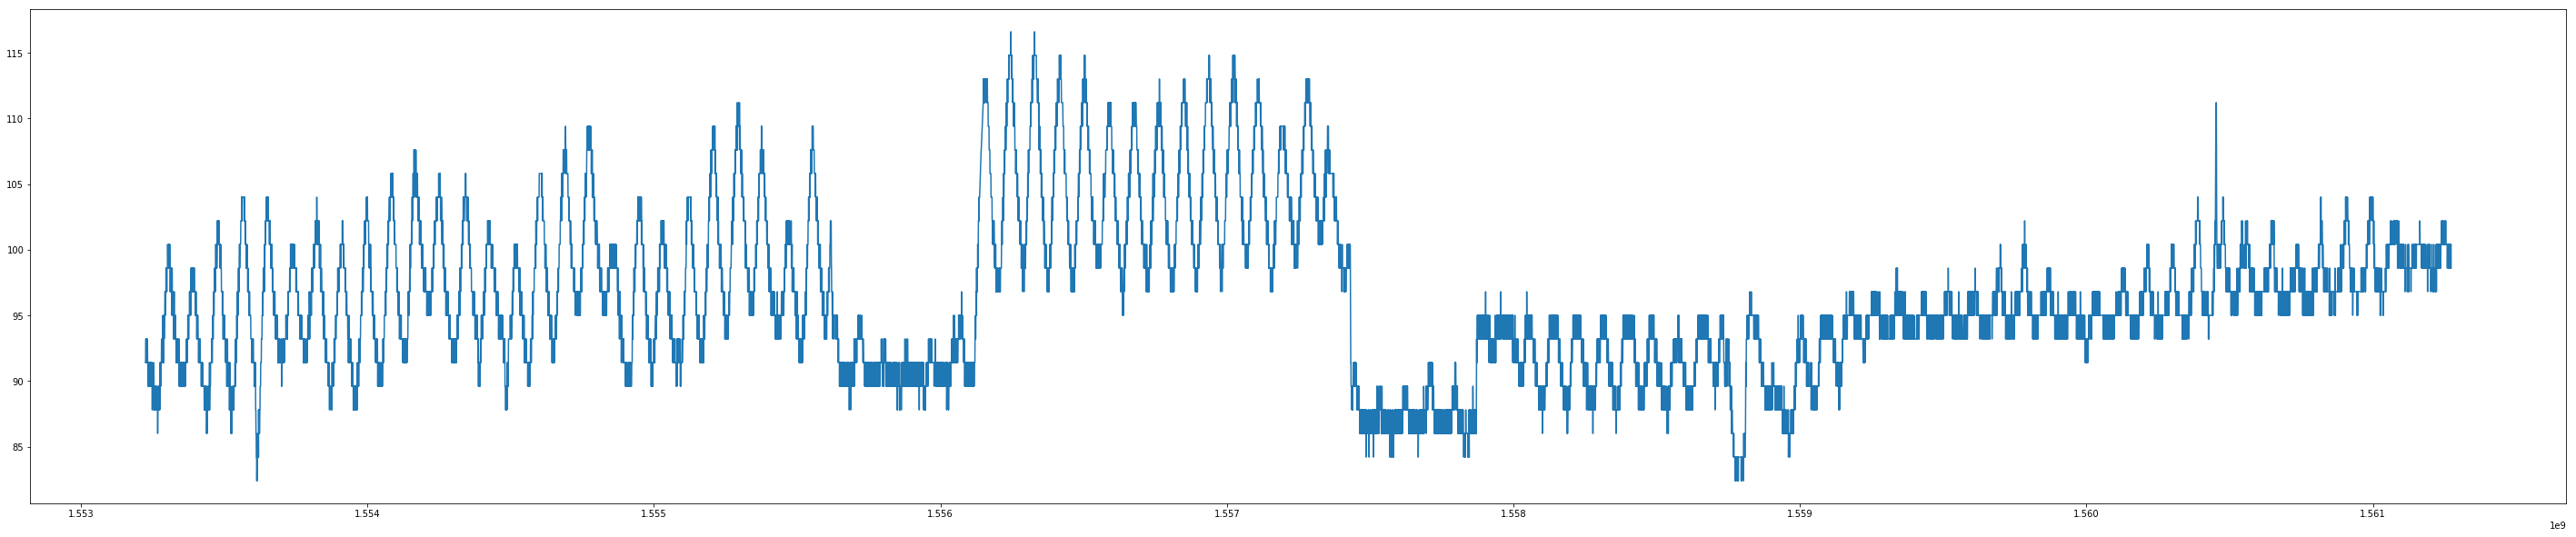

In [123]:
df_lrec2_spring = df_lrec2[37000:63700]
plot_ts(df_lrec2_spring)
metrics(df_lrec2_spring)

#### AC testing is on 44968 (Thu Apr 18 13:30:01 PDT 2019) to 46646 (Wed Apr 24 11:25:01 PDT 2019)

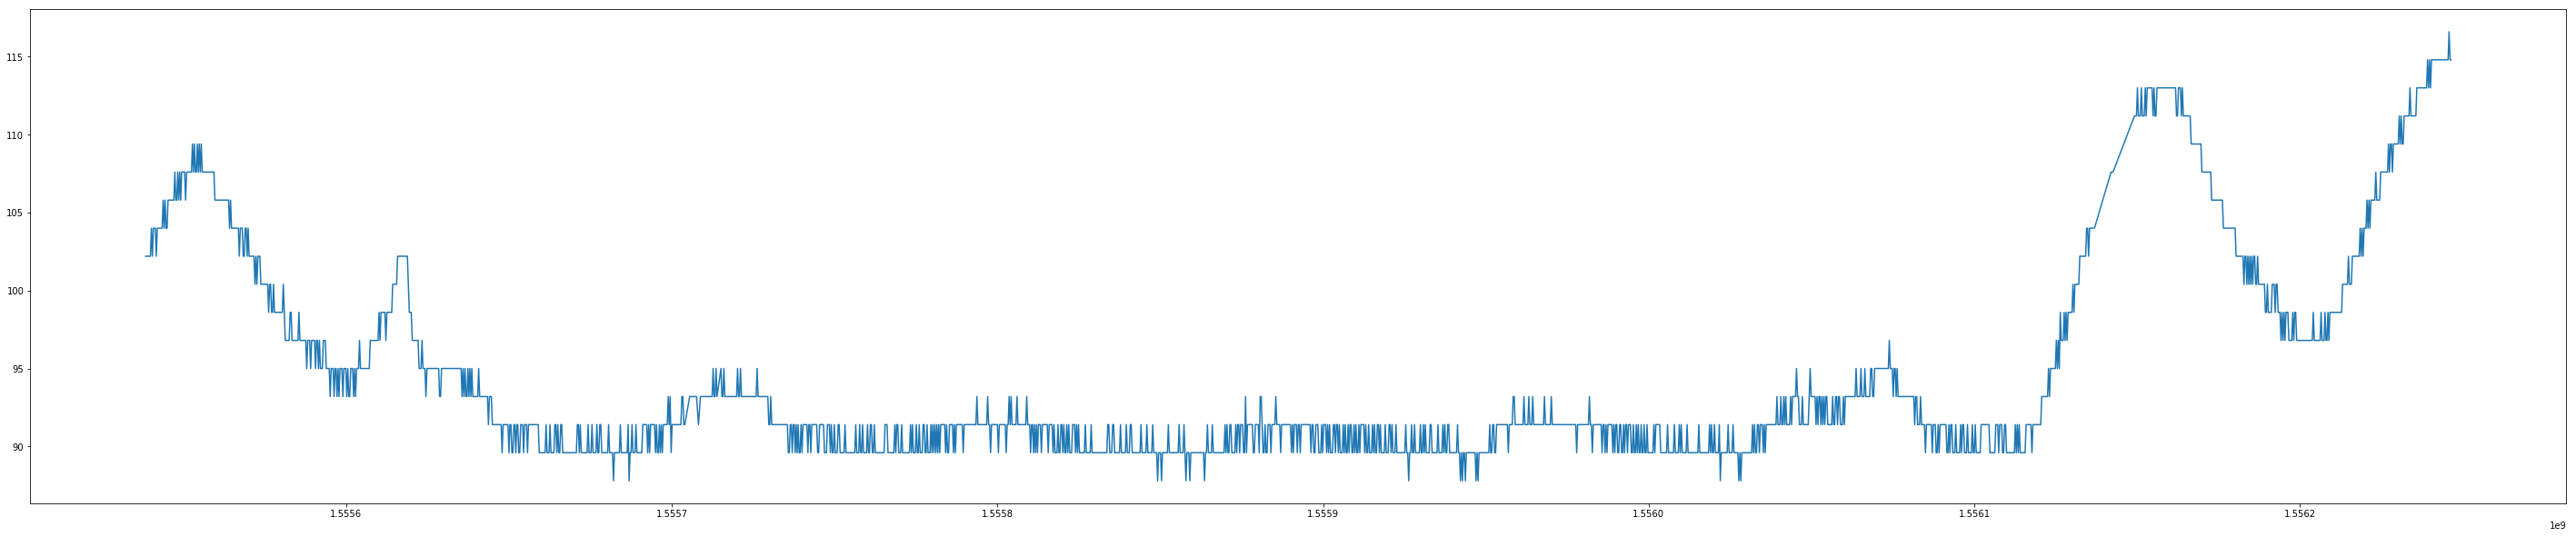

In [103]:
plot_ts(df_lrec2[44700:47000])

# lrec1.temp

### 2019 Spring (3/22 - 6/22)

Time slots CPU is under safe temperature 1360.25 hrs in 2160 hours
Time slots / total time = 0.63


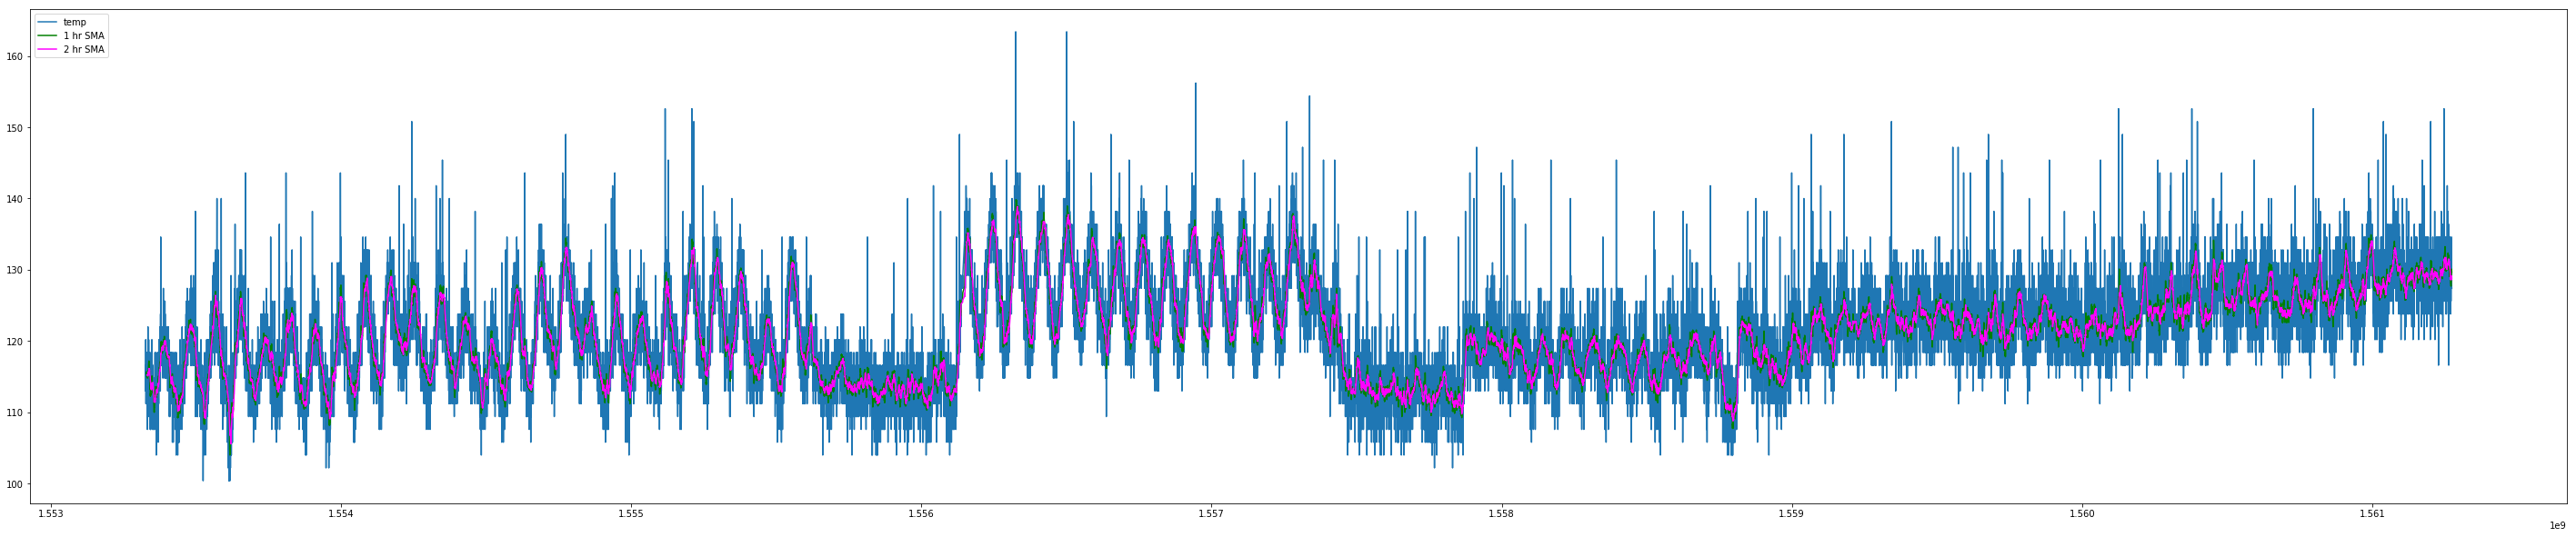

The mean temperature is 121.1667007847151 
The median temperature is 120.2 
The mode temperature is 116.6 
The stdev temperature is 6.983046392224802 
The max temperature is 163.4 
The min temperature is 100.4 


In [241]:
df_lrec1_spring = df_lrec1[108418:134797]
hrs = len(df_lrec1_spring[df_lrec1_spring['temp'] <= 122]) * 5 / 60
print ("Time slots CPU is under safe temperature {:.2f} hrs in {} hours".format(hrs, 90 * 24))
print ("Time slots / total time = {:.2f}".format(hrs / (90 * 24)))
print ("========")
plot_ts(df_lrec1_spring)
metrics(df_lrec1_spring)

#### AC is off ? 10925 (Sat Apr 7 17:00:01 PDT 2018) - 12055 (  Wed Apr 11 15:20:01 PDT 2018)

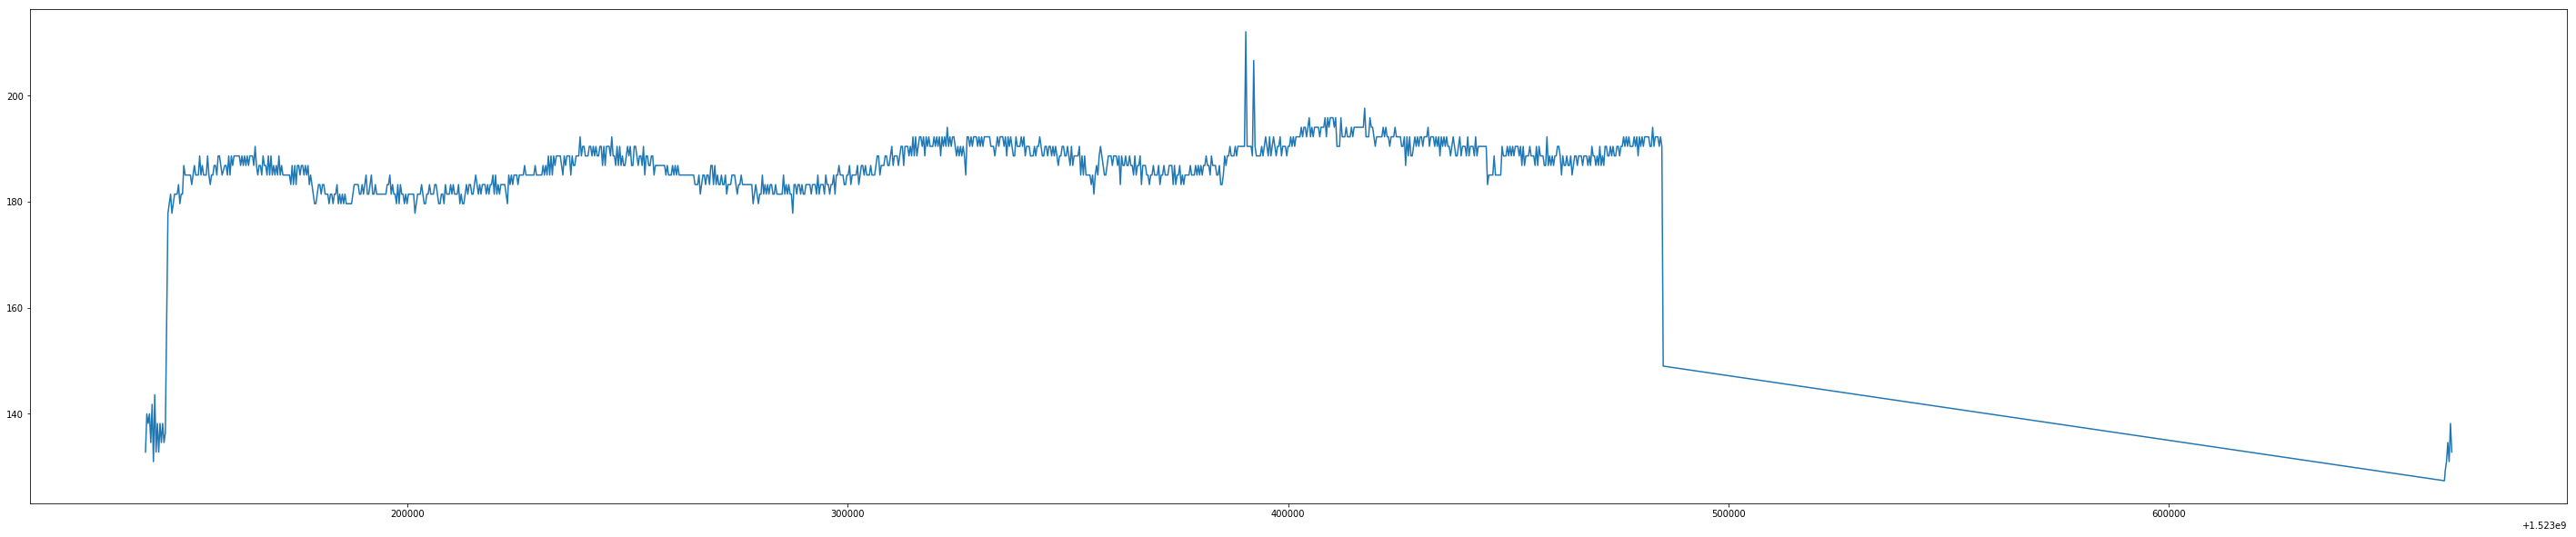

In [146]:
plot_ts(df_lrec1[10900:12055])

### 2019 Summer (6/22 - 9/22)

Time slots CPU is under safe temperature 173.17 hrs in 2160 hours
Time slots / total time = 0.08


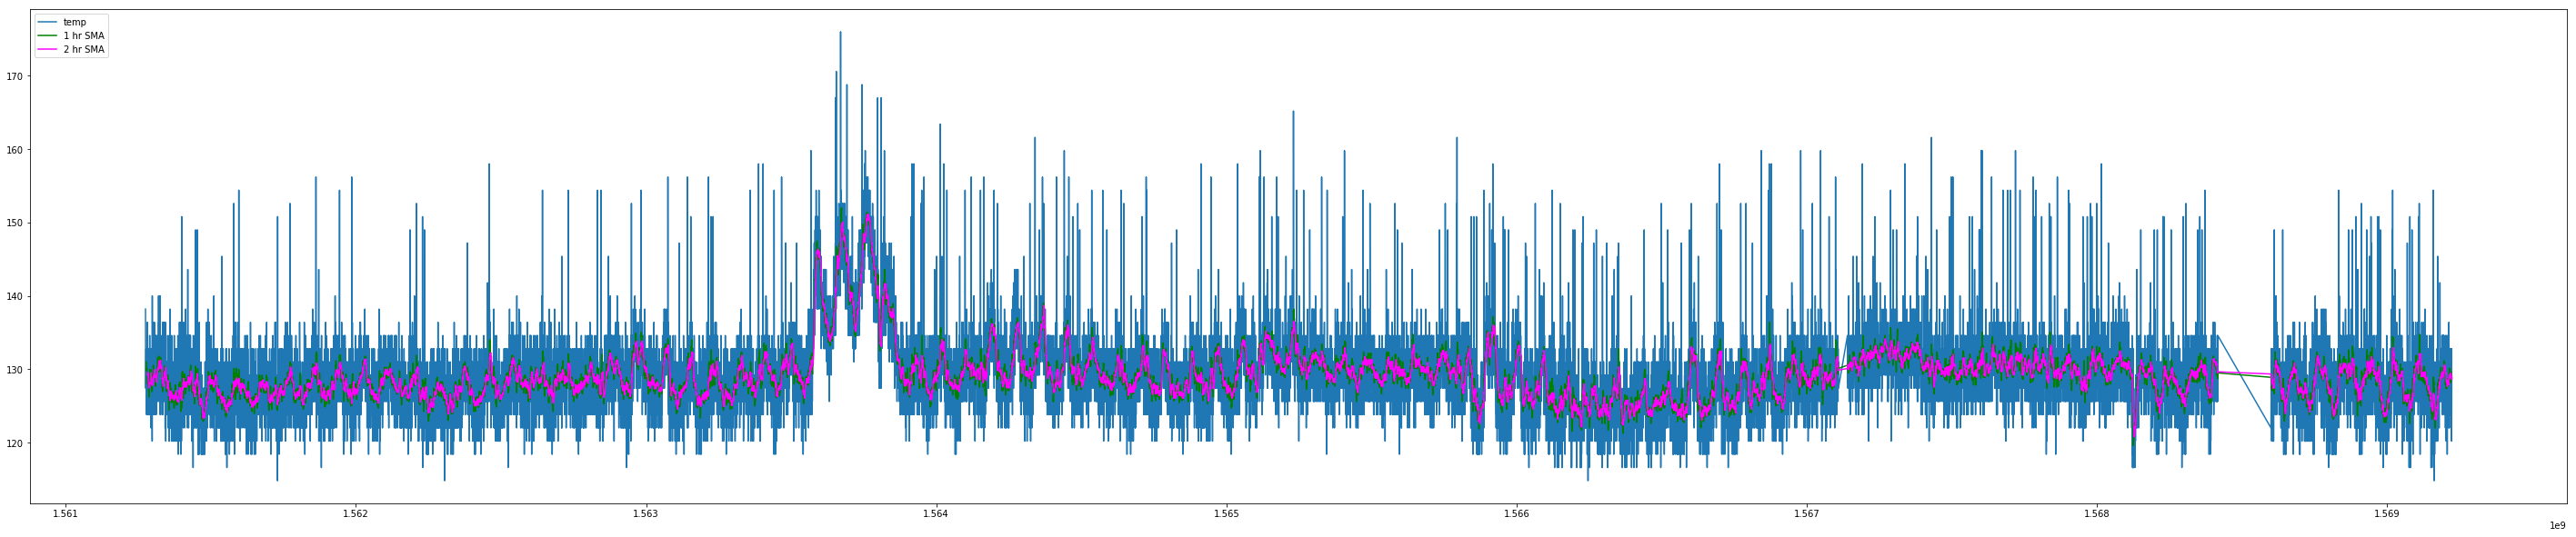

The mean temperature is 129.24360925609565 
The median temperature is 129.2 
The mode temperature is 127.4 
The stdev temperature is 5.313576118774239 
The max temperature is 176.0 
The min temperature is 114.8 


In [242]:
df_lrec1_summer = df_lrec1[134798:160554]
hrs = len(df_lrec1_summer[df_lrec1_summer['temp'] <= 122]) * 5 / 60
print ("Time slots CPU is under safe temperature {:.2f} hrs in {} hours".format(hrs, 90 * 24))
print ("Time slots / total time = {:.2f}".format(hrs / (90 * 24)))
print ("========")
plot_ts(df_lrec1_summer)
metrics(df_lrec1_summer)

### 2019 Fall (9/22 - 12/22)

Time slots CPU is under safe temperature 1385.33 hrs in 2160 hours
Time slots / total time = 0.64


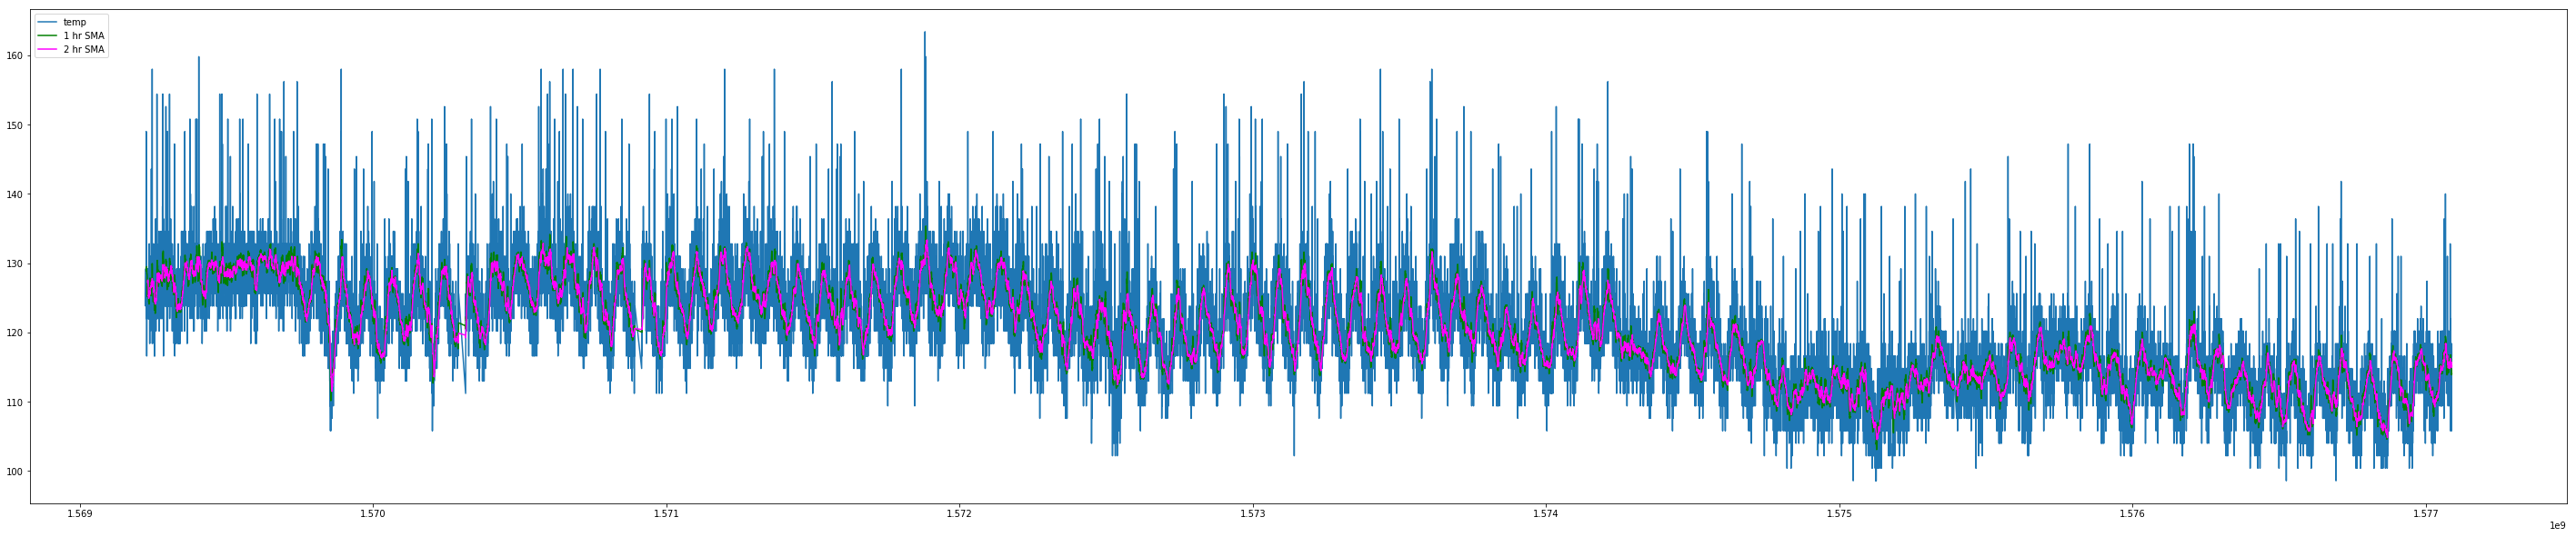

The mean temperature is 120.18353384325633 
The median temperature is 120.2 
The mode temperature is 116.6 
The stdev temperature is 7.754997560144251 
The max temperature is 163.4 
The min temperature is 98.6 


In [243]:
df_lrec1_fall = df_lrec1[160555:186572]
hrs = len(df_lrec1_fall[df_lrec1_fall['temp'] <= 122]) * 5 / 60
print ("Time slots CPU is under safe temperature {:.2f} hrs in {} hours".format(hrs, 90 * 24))
print ("Time slots / total time = {:.2f}".format(hrs / (90 * 24)))
print ("========")
plot_ts(df_lrec1_fall)
metrics(df_lrec1_fall)

### 2020 Winter (12/22 - 3/22)

Time slots CPU is under safe temperature 1747.92 hrs in 2160 hours
Time slots / total time = 0.81


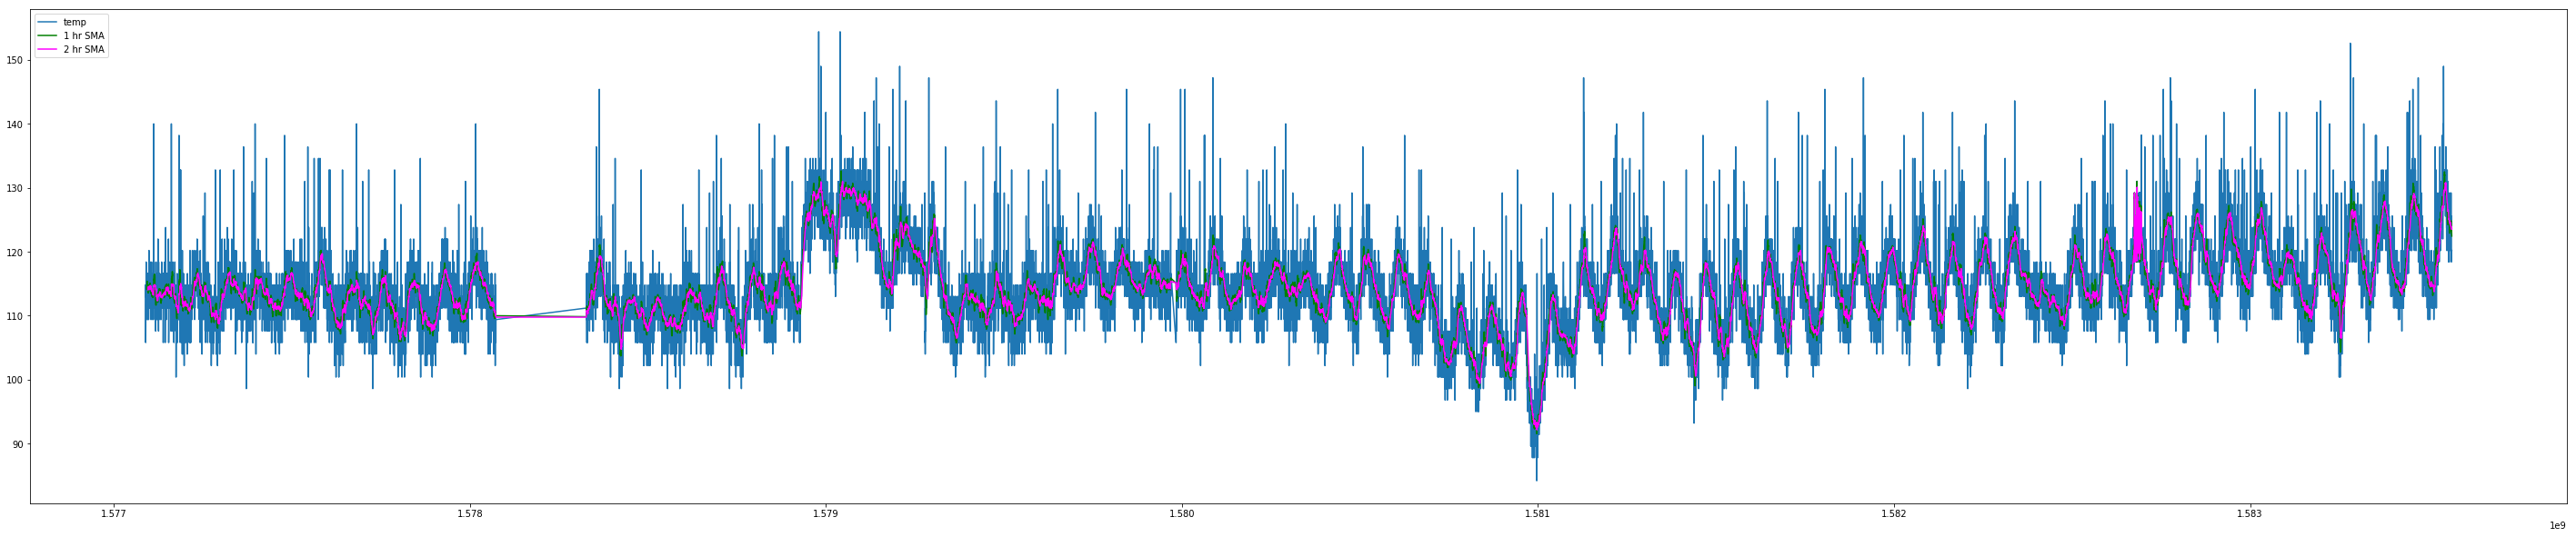

The mean temperature is 115.97808708065669 
The median temperature is 114.8 
The mode temperature is 114.8 
The stdev temperature is 7.001453434617688 
The max temperature is 154.4 
The min temperature is 84.2 


In [244]:
df_lrec1_winter = df_lrec1[186573:211791]
hrs = len(df_lrec1_winter[df_lrec1_winter['temp'] <= 122]) * 5 / 60
print ("Time slots CPU is under safe temperature {:.2f} hrs in {} hours".format(hrs, 90 * 24))
print ("Time slots / total time = {:.2f}".format(hrs / (90 * 24)))
print ("=========")
plot_ts(df_lrec1_winter)
metrics(df_lrec1_winter)

Time slots CPU is under safe temperature 1115 mins in 24 hours
The mean temperature is 120.09337979094077 
The median temperature is 120.2 
The mode temperature is 116.6 
The stdev temperature is 4.8214473574839305 
The max temperature is 143.6 
The min temperature is 111.2 


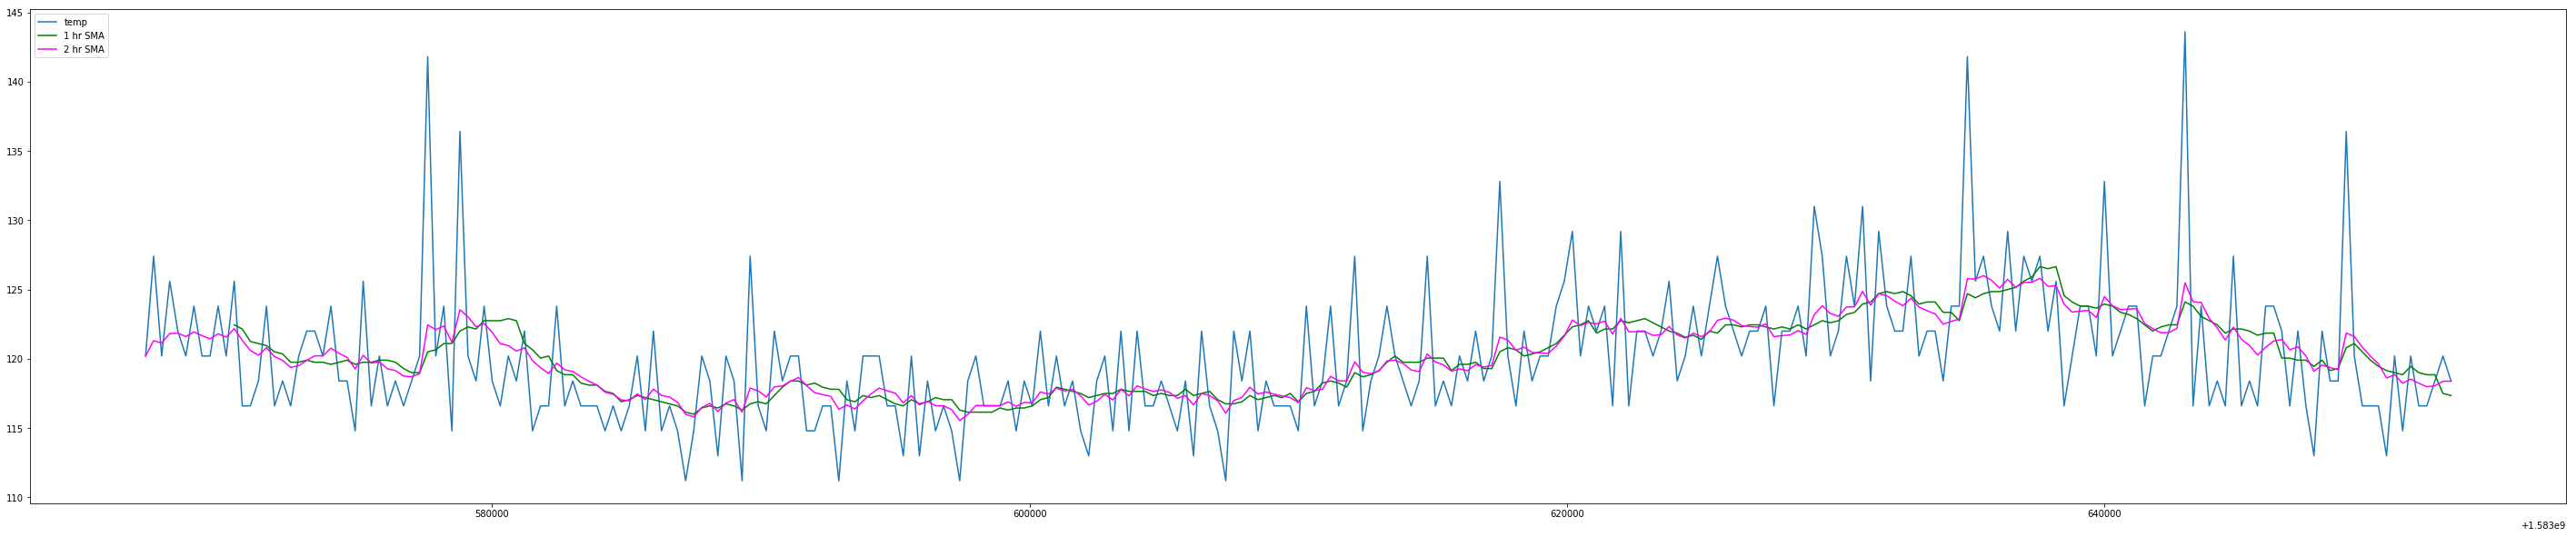

In [248]:
df_lrec1_03232020 = df_lrec1[211792: 212079]

# CPU Safe temperature [95F - 122F]
print ("Time slots CPU is under safe temperature {} mins in 24 hours".format(
    len(df_lrec1_03232020[df_lrec1_03232020['temp']<=122]) * 5))
print ("================")
metrics(df_lrec1_03232020)

plot_ts(df_lrec1_03232020)

Time slots CPU is under safe temperature 10 mins in 24 hours
The mean temperature is 136.5567944250871 
The median temperature is 134.6 
The mode temperature is 132.8 
The stdev temperature is 8.210658315146278 
The max temperature is 174.2 
The min temperature is 120.2 


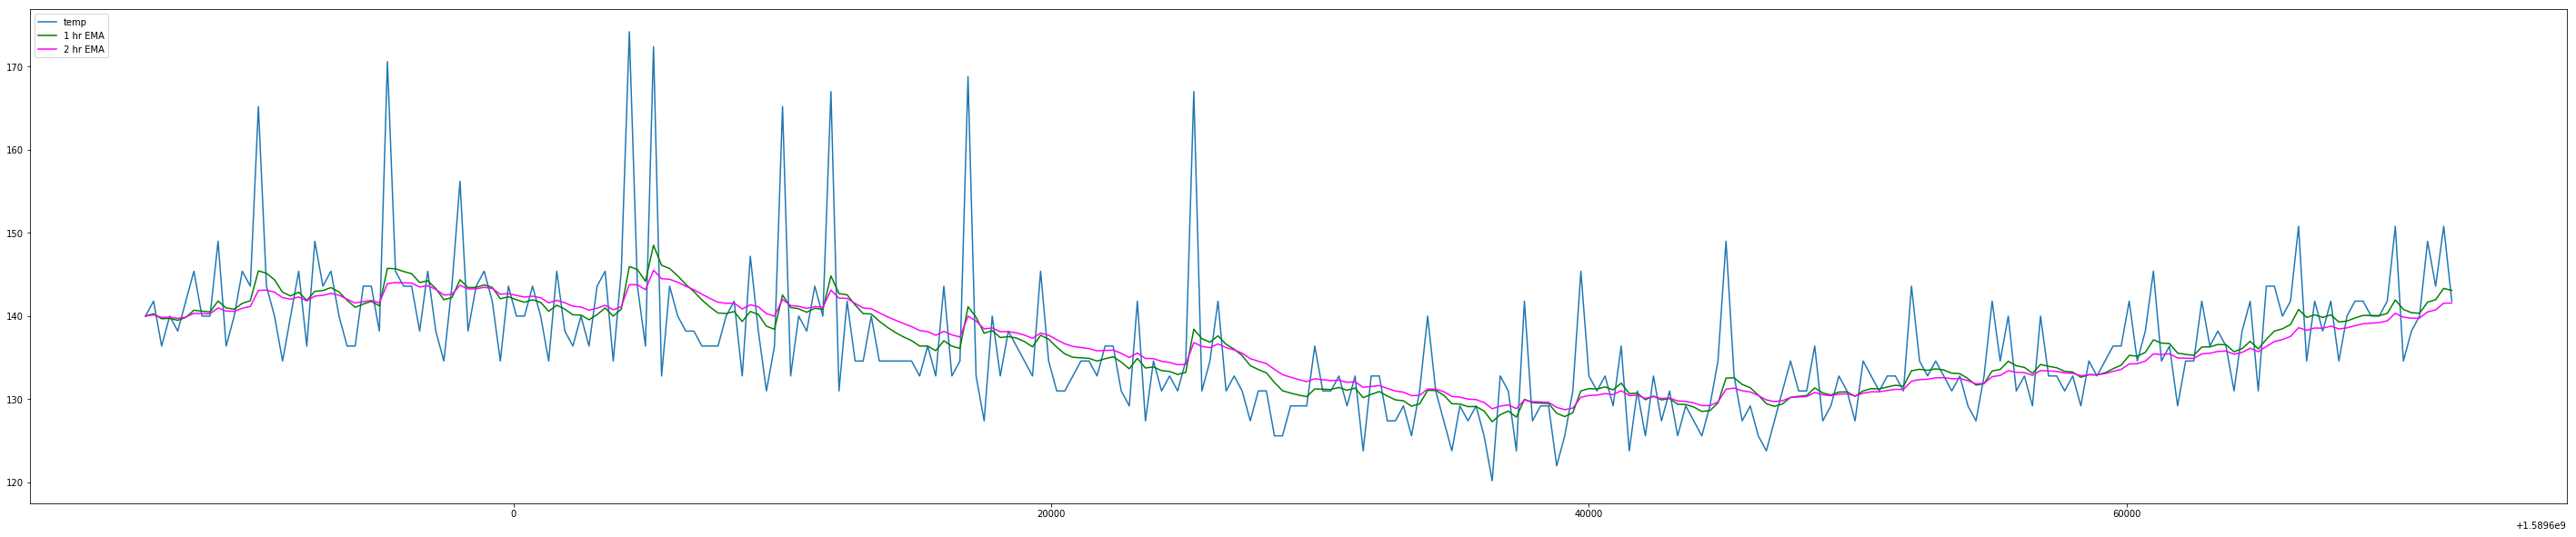

In [254]:
df_lrec1_06012020 = df_lrec1[231841: 232128]

# CPU Safe temperature [95F - 122F]
print ("Time slots CPU is under safe temperature {} mins in 24 hours".format(
    len(df_lrec1_06012020[df_lrec1_06012020['temp']<=122]) * 5))
print ("================")
metrics(df_lrec1_06012020)

plot_ts(df_lrec1_06012020)

### Seasonal Thresholding: 120F - Spring && Fall 115F - Winter 130F - Summer
### Diurnal Thresholding: Moving average [95F, 122F] 

### Mayhem Cloud Cluster
### Fri Jun 5 - Tue Jun 9

The mean temperature is 117.71307947019866 
The median temperature is 116.6 
The mode temperature is 116.6 
The stdev temperature is 2.5869395609367096 
The max temperature is 149.0 
The min temperature is 114.8 


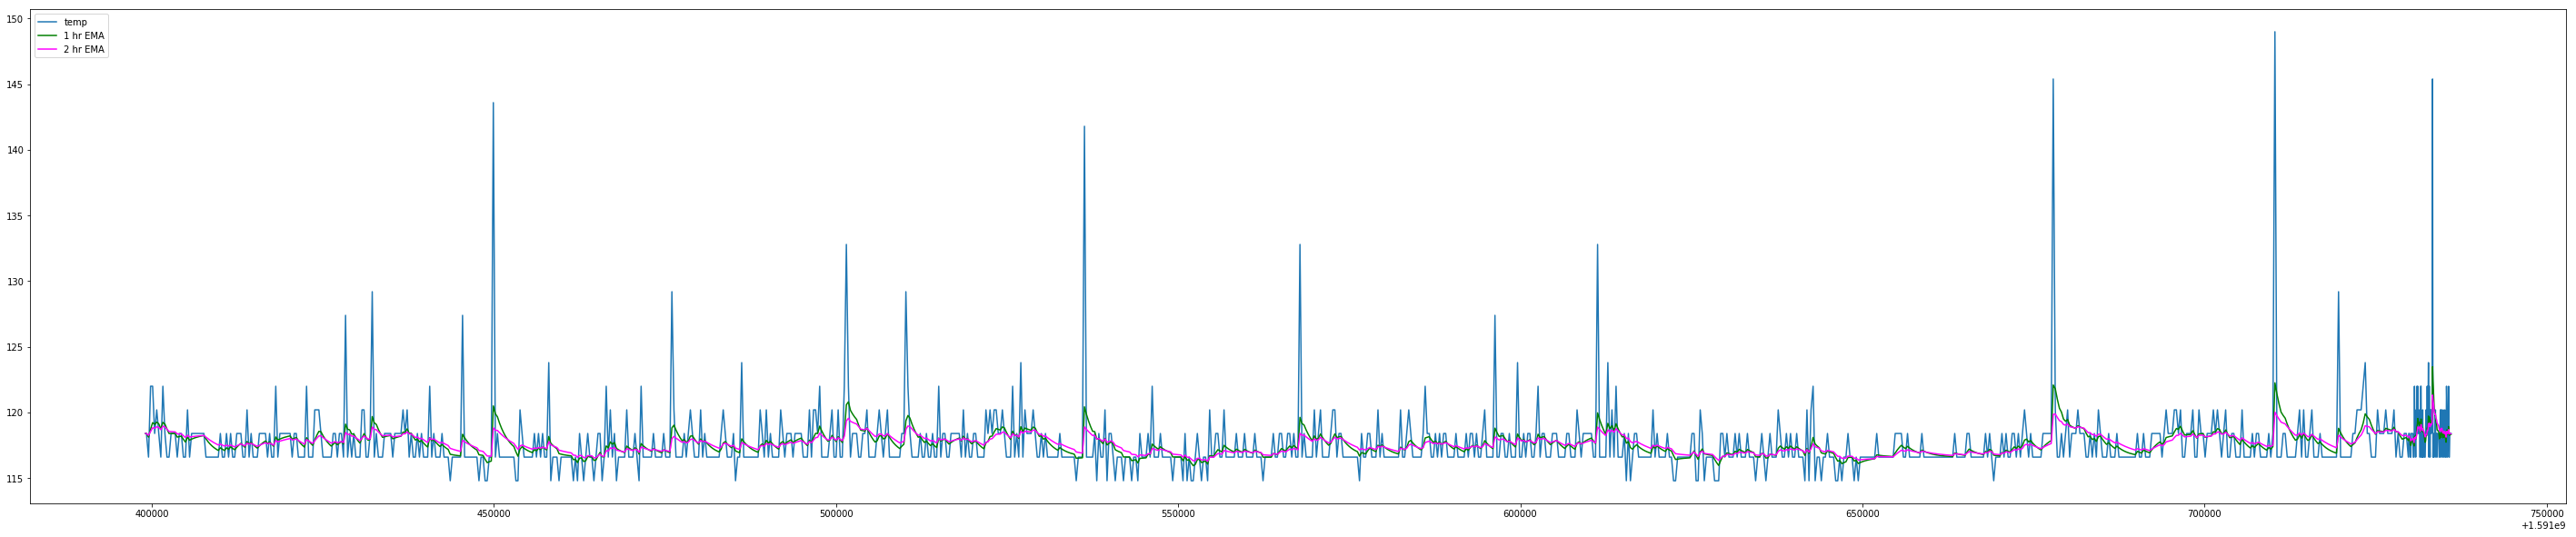

In [267]:
metrics(df_mayhem[0:1208])
plot_ts(df_mayhem[0:1208])

### Mayhem Jun 9th

The mean temperature is 118.3424 
The median temperature is 118.4 
The mode temperature is 116.6 
The stdev temperature is 3.127575603662766 
The max temperature is 149.0 
The min temperature is 116.6 


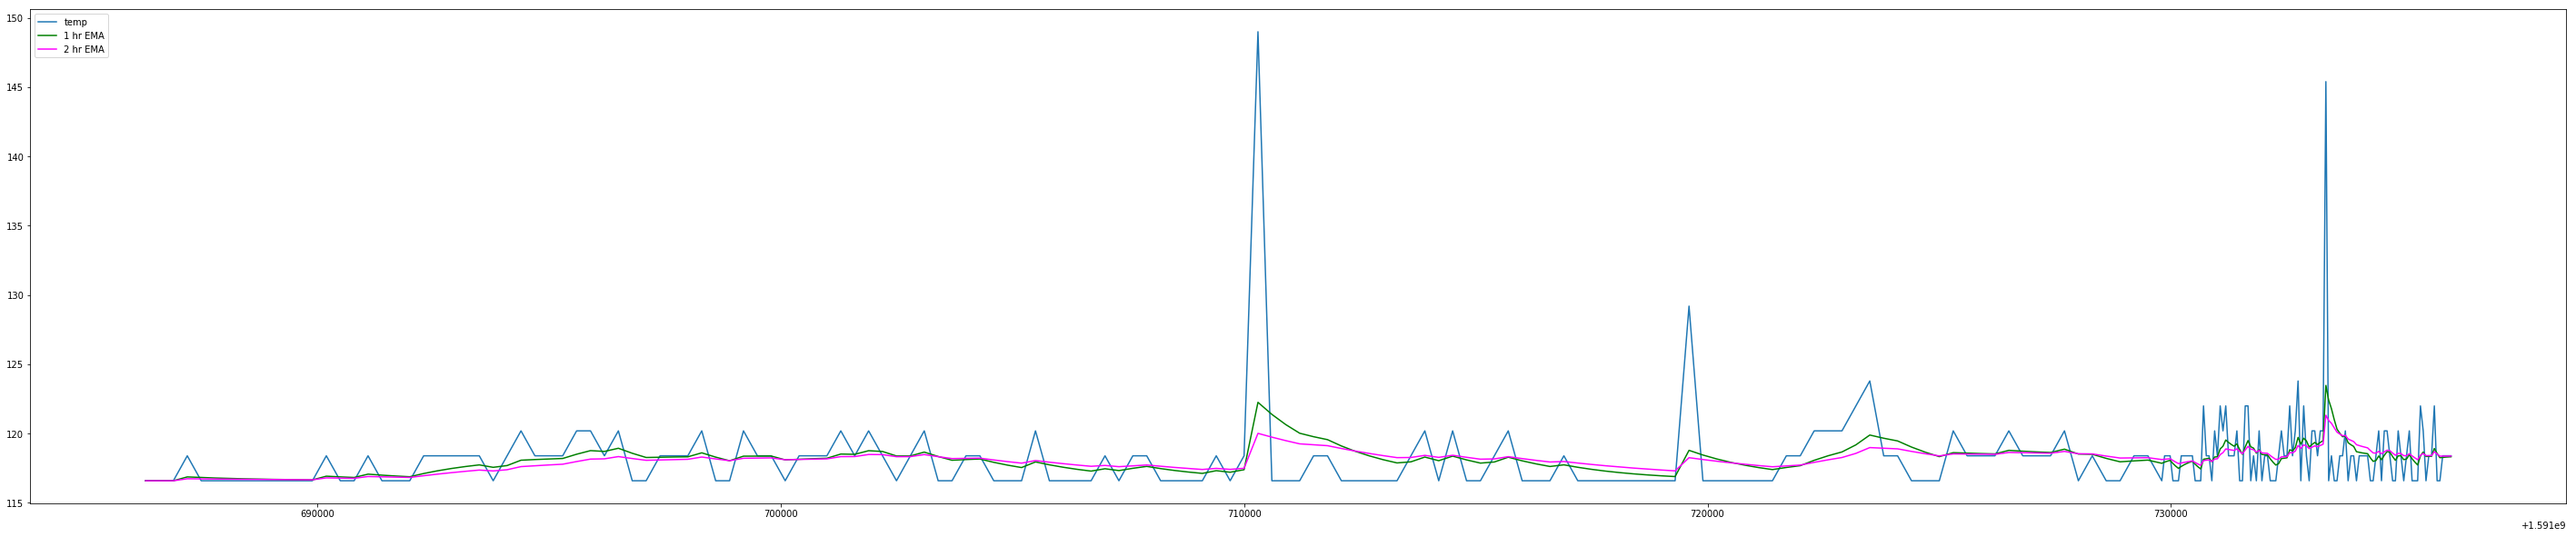

In [272]:
metrics(df_mayhem[958:1208])
plot_ts(df_mayhem[958:1208])

### Mayhem Cluster 11:00 - 13:00

The mean temperature is 118.6593220338983 
The median temperature is 118.4 
The mode temperature is 118.4 
The stdev temperature is 2.9979262715410195 
The max temperature is 145.4 
The min temperature is 116.6 


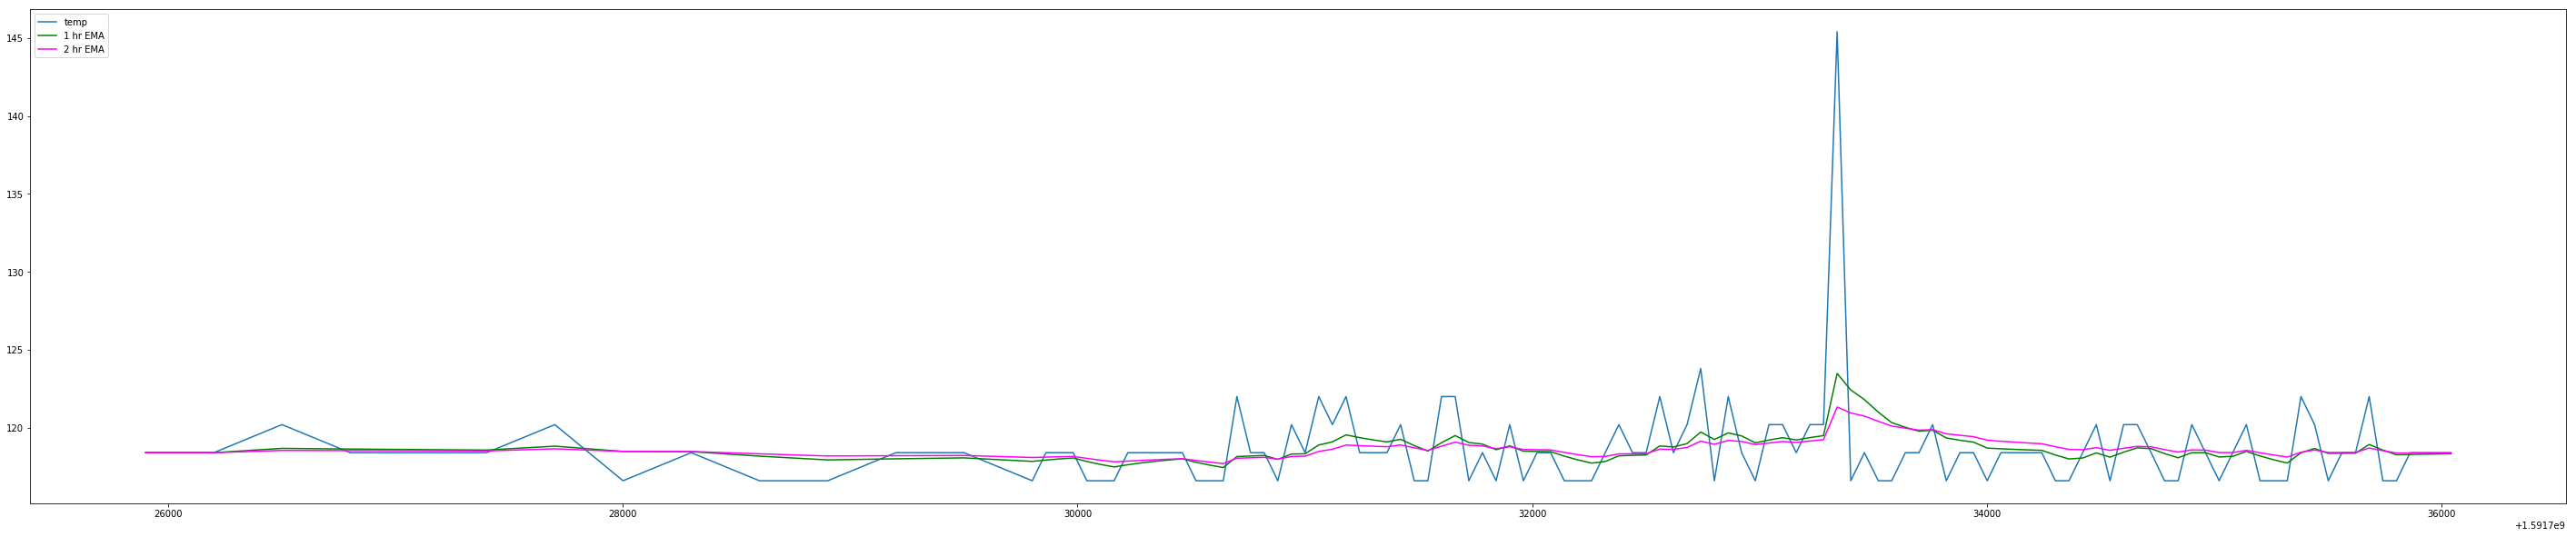

In [271]:
metrics(df_mayhem[1090:1208])
plot_ts(df_mayhem[1090:1208])

Time slots CPU is under safe temperature 79 mins in 81 mins
The mean temperature is 119.13333333333333 
The median temperature is 118.4 
The mode temperature is 118.4 
The stdev temperature is 1.7259779836371032 
The max temperature is 123.8 
The min temperature is 114.8 


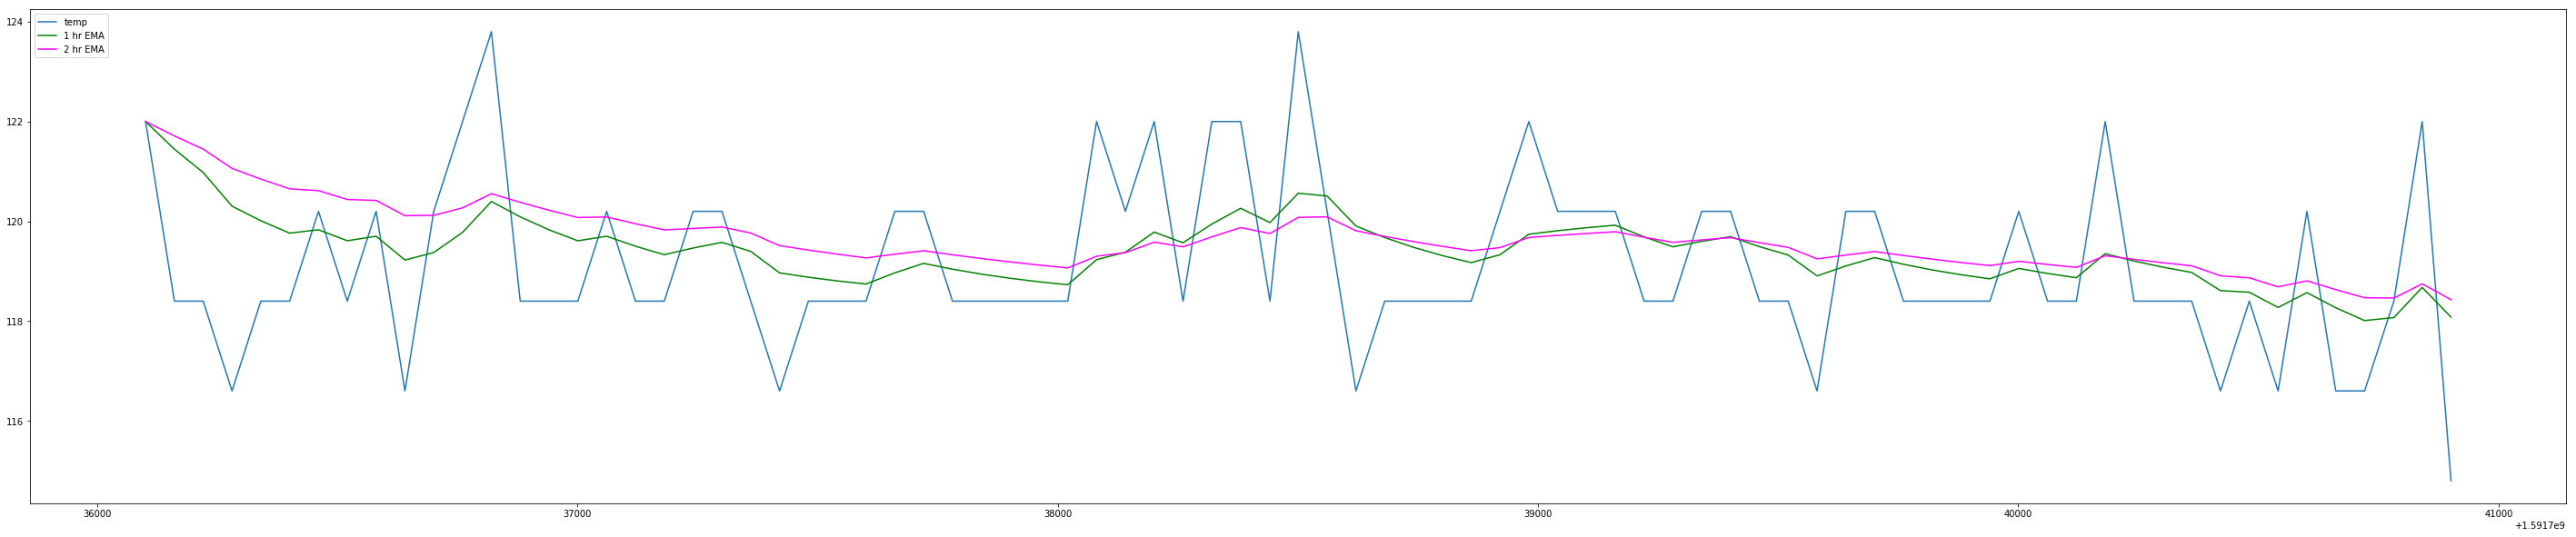

In [273]:
df_0609 = df_mayhem[1208:]
# CPU Safe temperature [95F - 122F]
print ("Time slots CPU is under safe temperature {} mins in {} mins".format(
    len(df_0609[df_0609['temp']<=122]), len(df_0609)))
metrics(df_0609)
plot_ts(df_0609)

Time slots CPU is under safe temperature 0 mins in 40 mins
The mean temperature is 192.875 
The median temperature is 193.1 
The mode temperature is 192.2 
The stdev temperature is 3.6387339302818815 
The max temperature is 199.4 
The min temperature is 181.4 


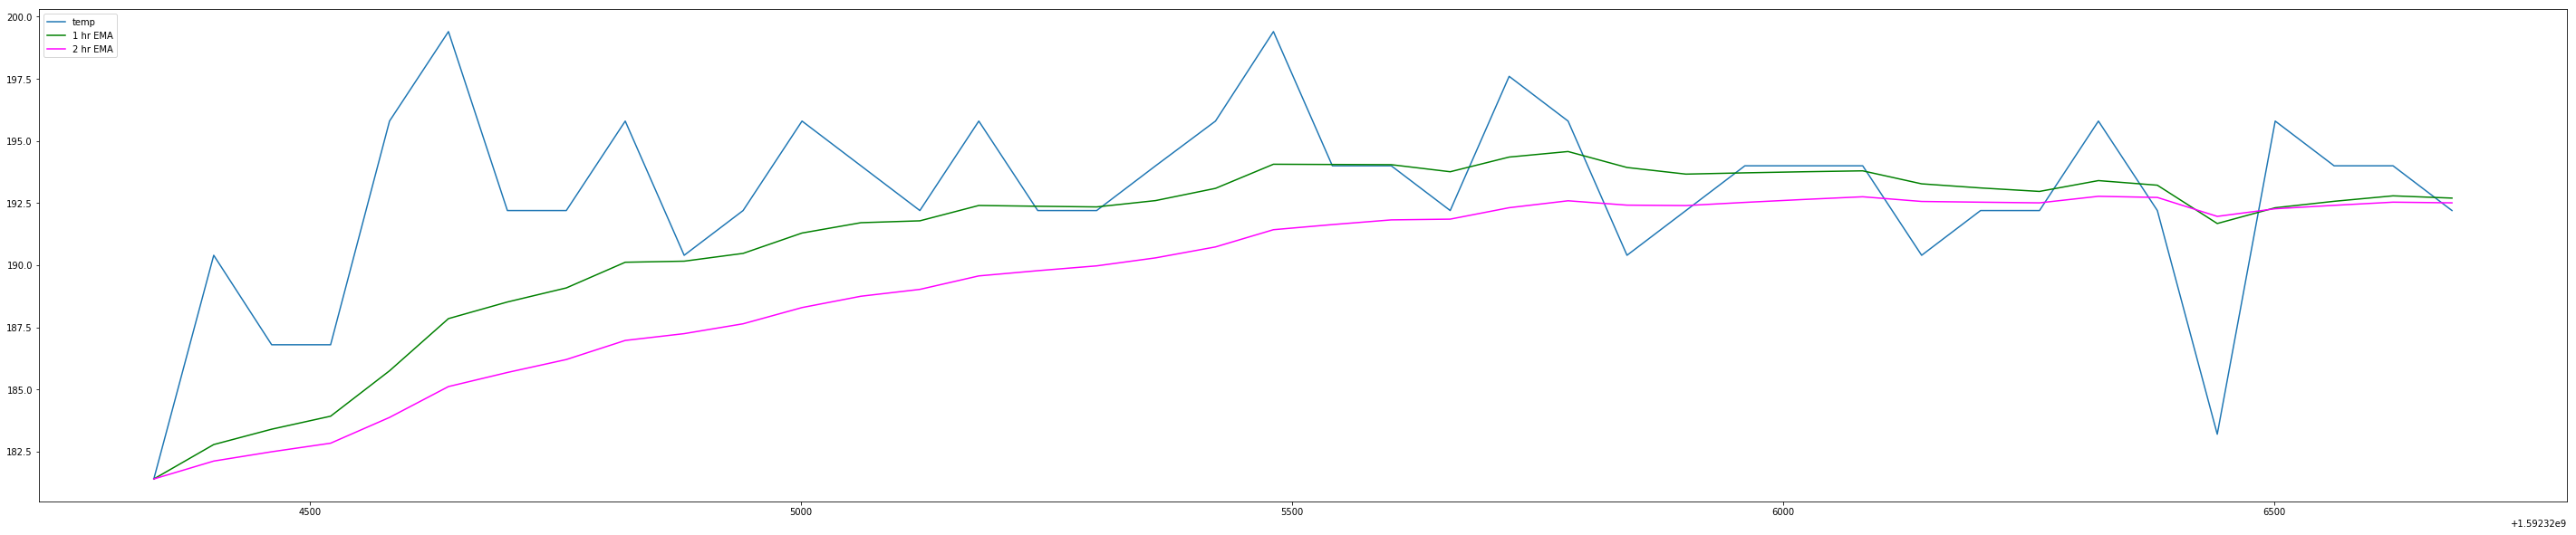

In [9]:
analyze(df_thread[1:41])


Time slots CPU is under safe temperature 0 mins in 10945 mins
The mean temperature is 193.1490909090909 
The median temperature is 210.2 
The mode temperature is 212.0 
The stdev temperature is 32.371031041931666 
The max temperature is 212.0 
The min temperature is 123.8 


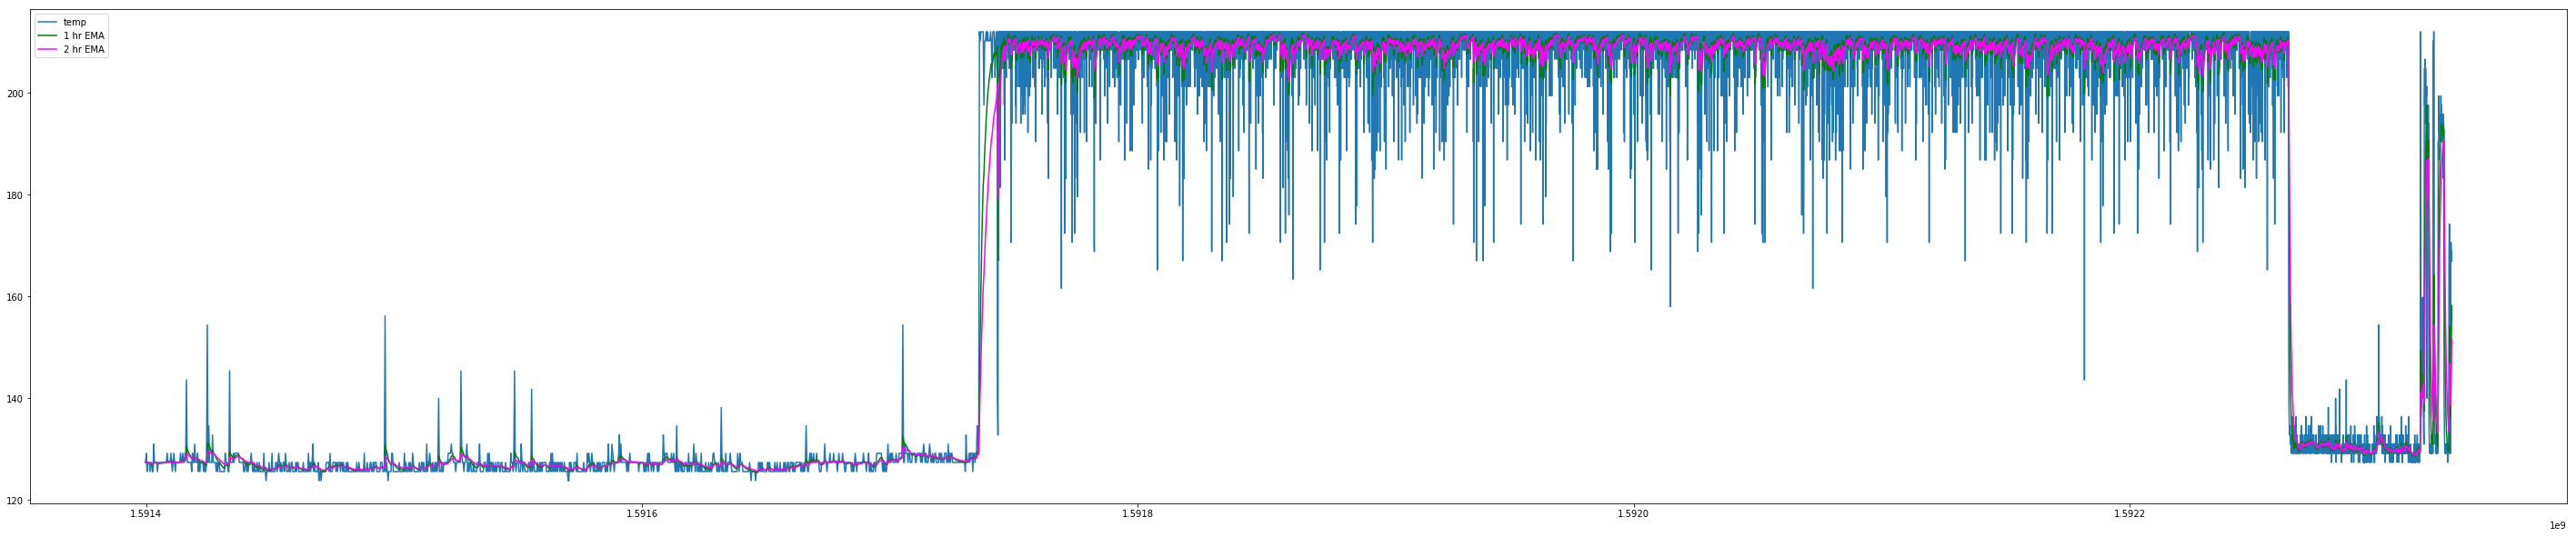

In [11]:
analyze(df_mayhem4)

Time slots CPU is under safe temperature 0 mins in 42 mins
The mean temperature is 195.8 
The median temperature is 203.0 
The mode temperature is 210.2 
The stdev temperature is 18.7230391529247 
The max temperature is 212.0 
The min temperature is 129.2 


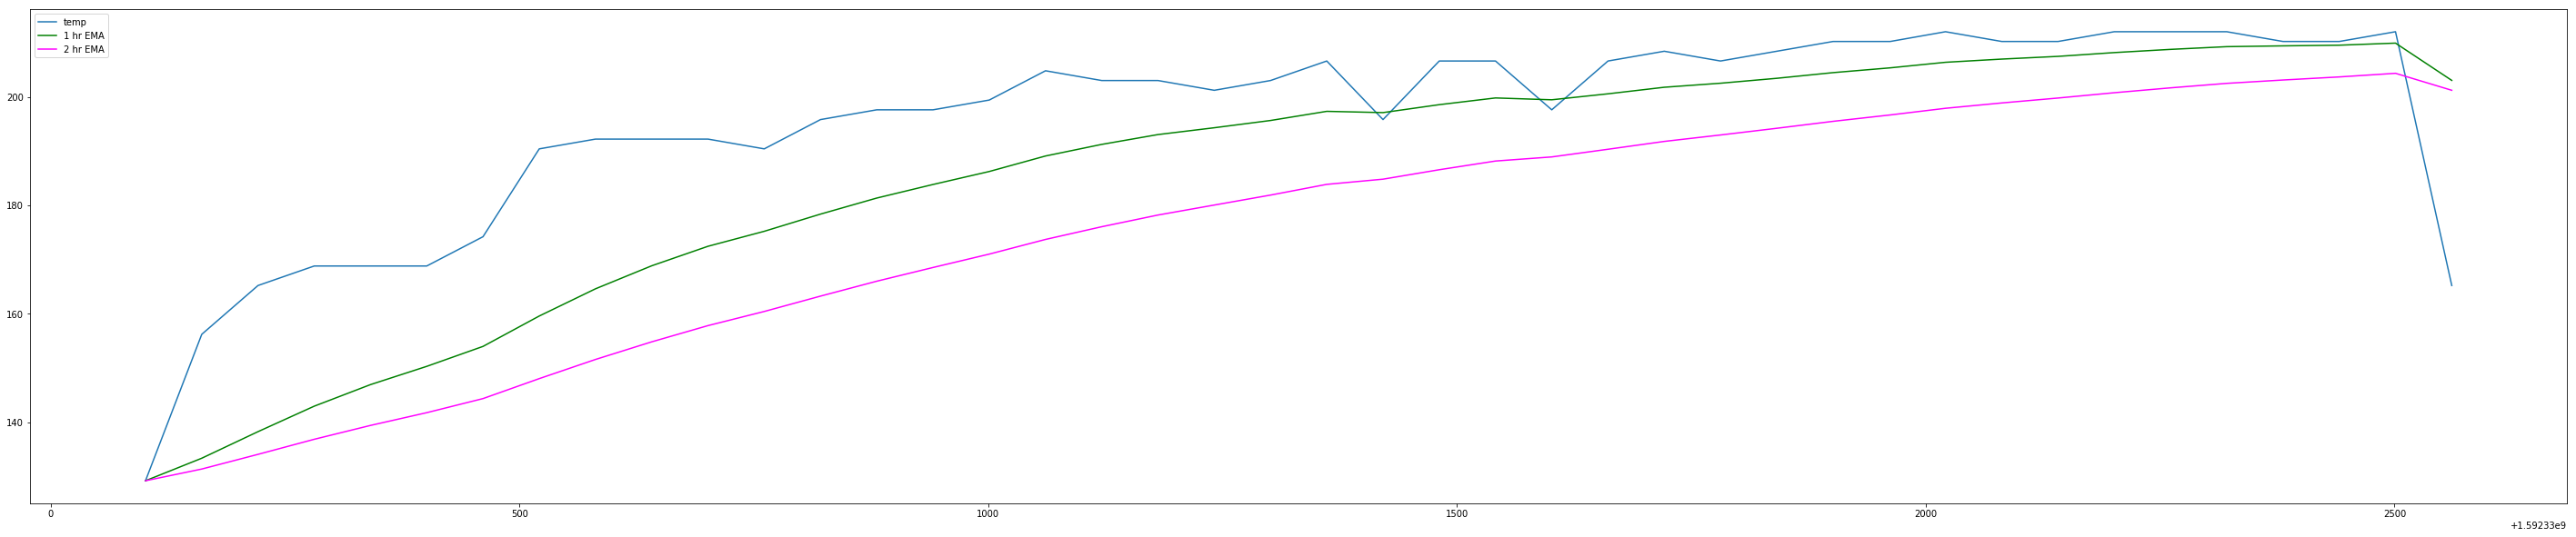

In [13]:
analyze(df_thread)

### Thread vs Temp

Time slots CPU is under safe temperature 0 mins in 45 mins
The mean temperature is 192.2 
The median temperature is 199.4 
The mode temperature is 203.0 
The stdev temperature is 18.53610727006274 
The max temperature is 212.0 
The min temperature is 129.2 


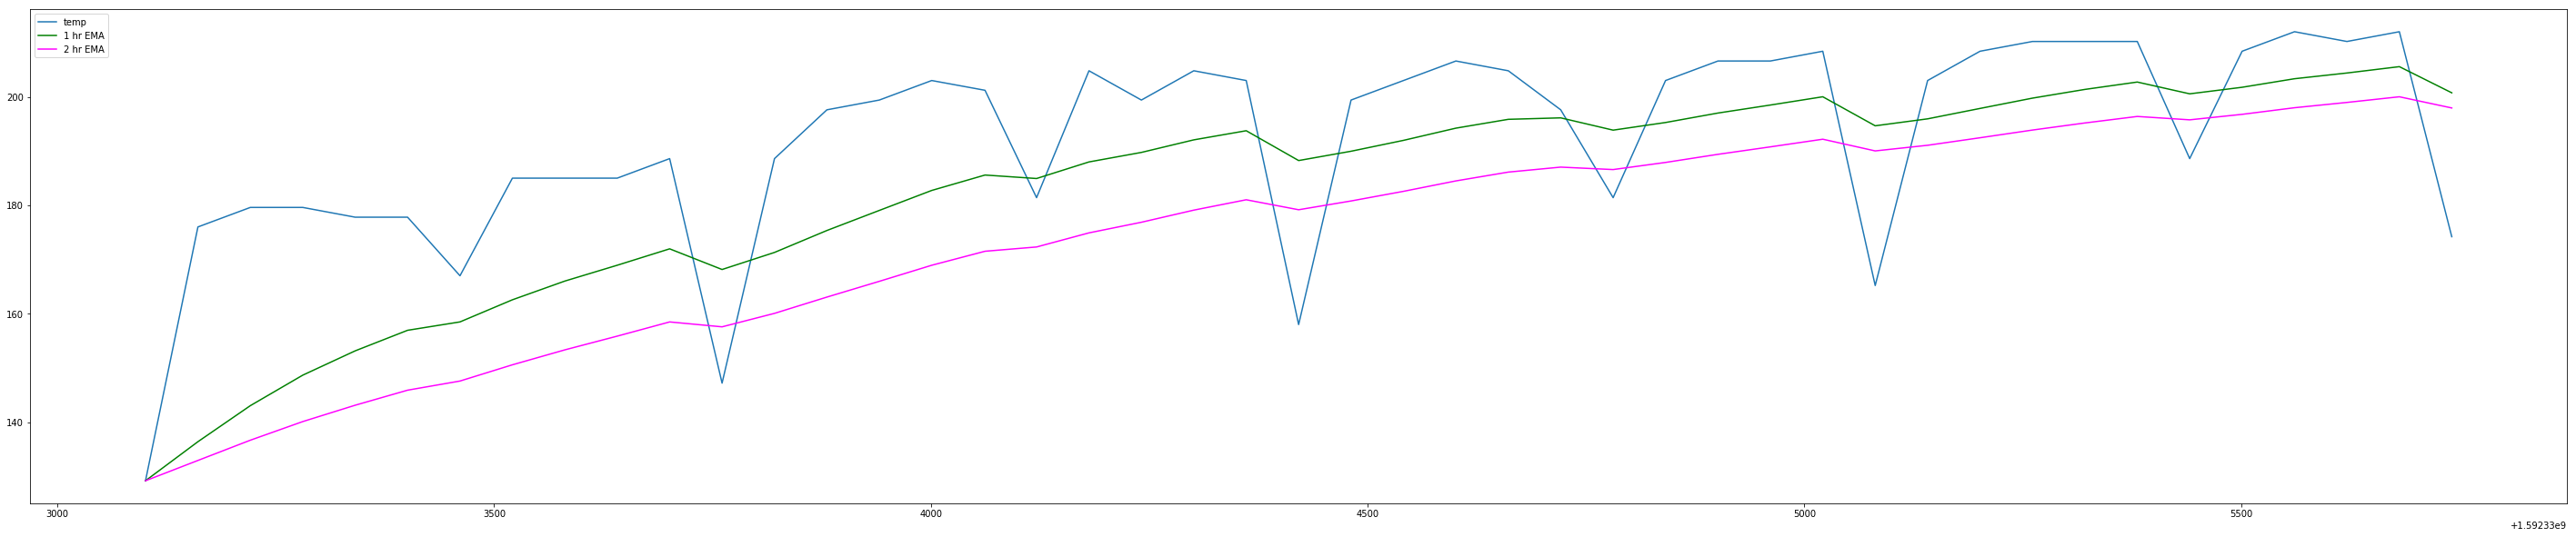

In [31]:
analyze(df_thread2)

i : 1
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 165.56 
The median temperature is 168.8 
The mode temperature is 168.8 
The stdev temperature is 5.459670319717127 
The max temperature is 168.8 
The min temperature is 156.2 


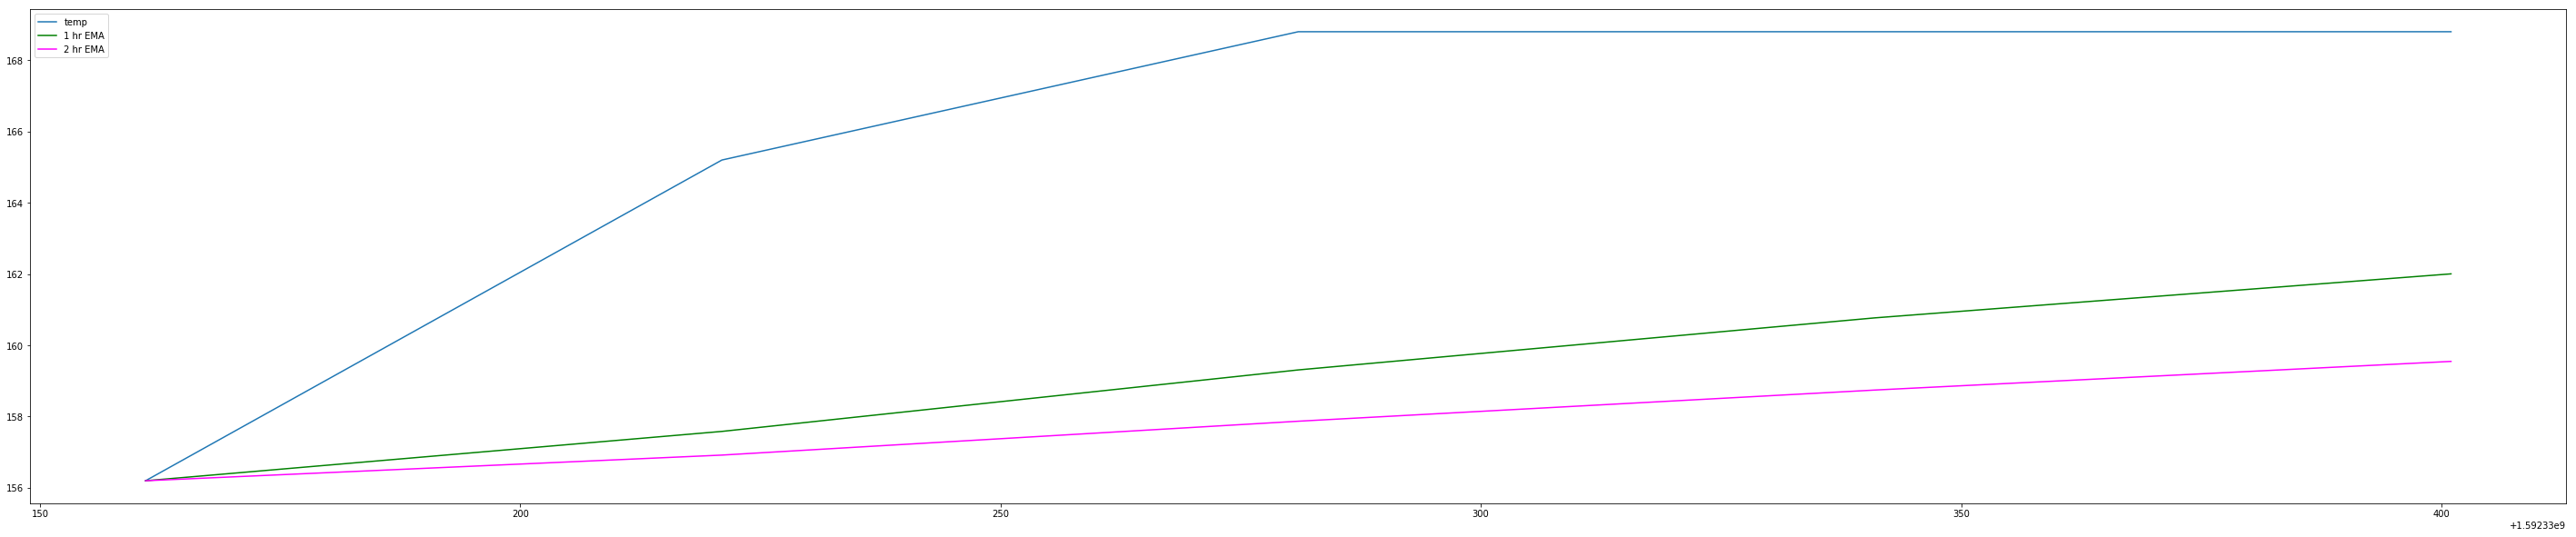

i : 6
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 188.24 
The median temperature is 192.2 
The mode temperature is 192.2 
The stdev temperature is 7.887204828074394 
The max temperature is 192.2 
The min temperature is 174.2 


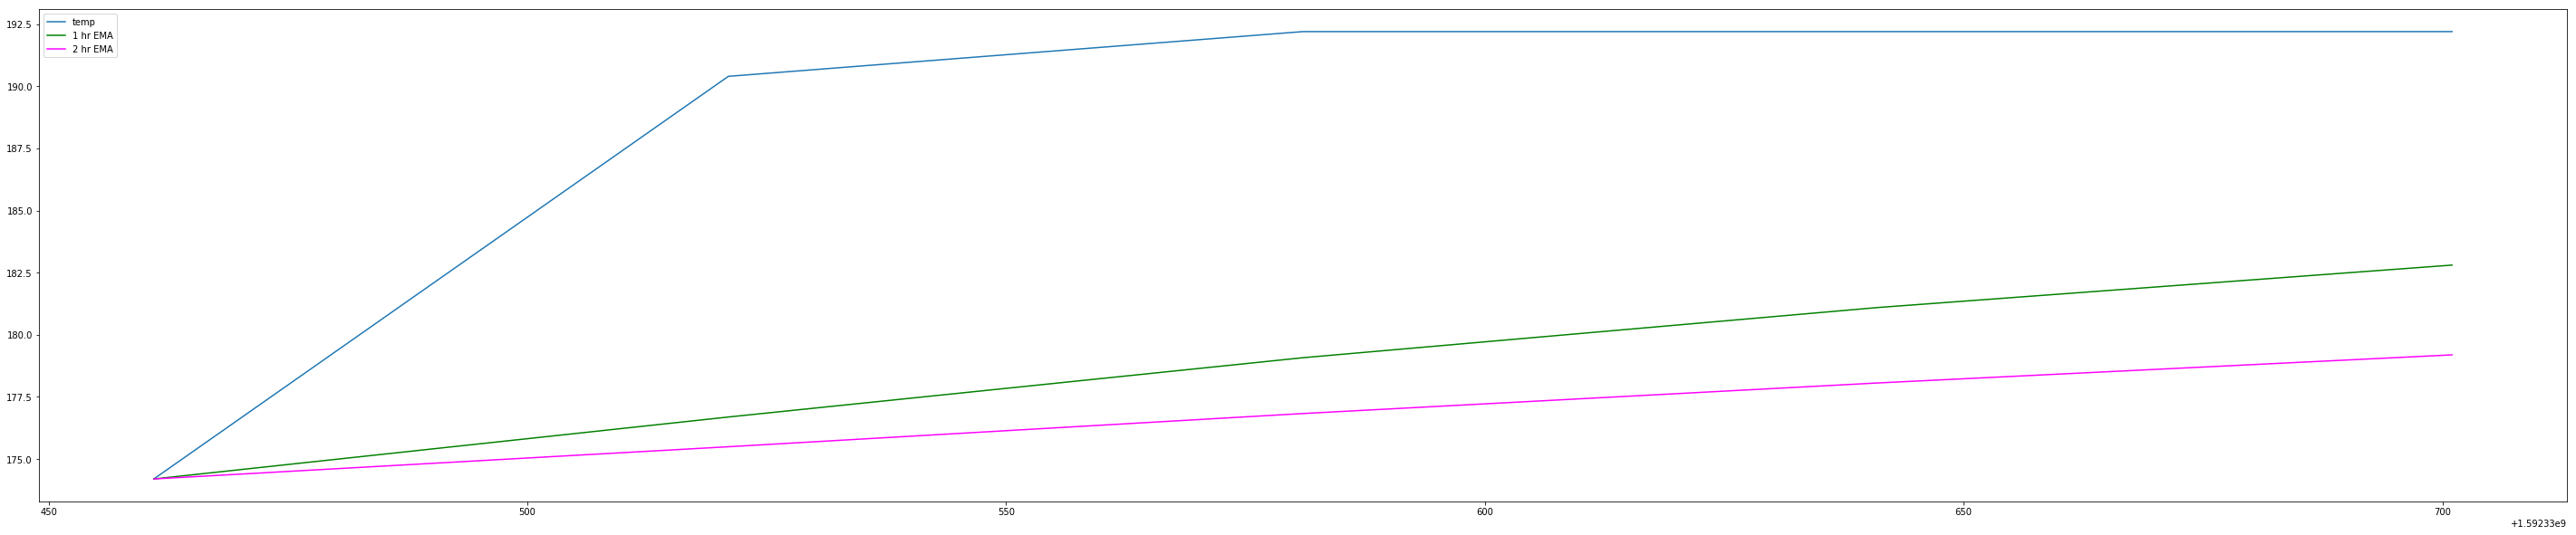

i : 11
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 196.16000000000003 
The median temperature is 197.6 
The mode temperature is 197.6 
The stdev temperature is 3.4623691311008398 
The max temperature is 199.4 
The min temperature is 190.4 


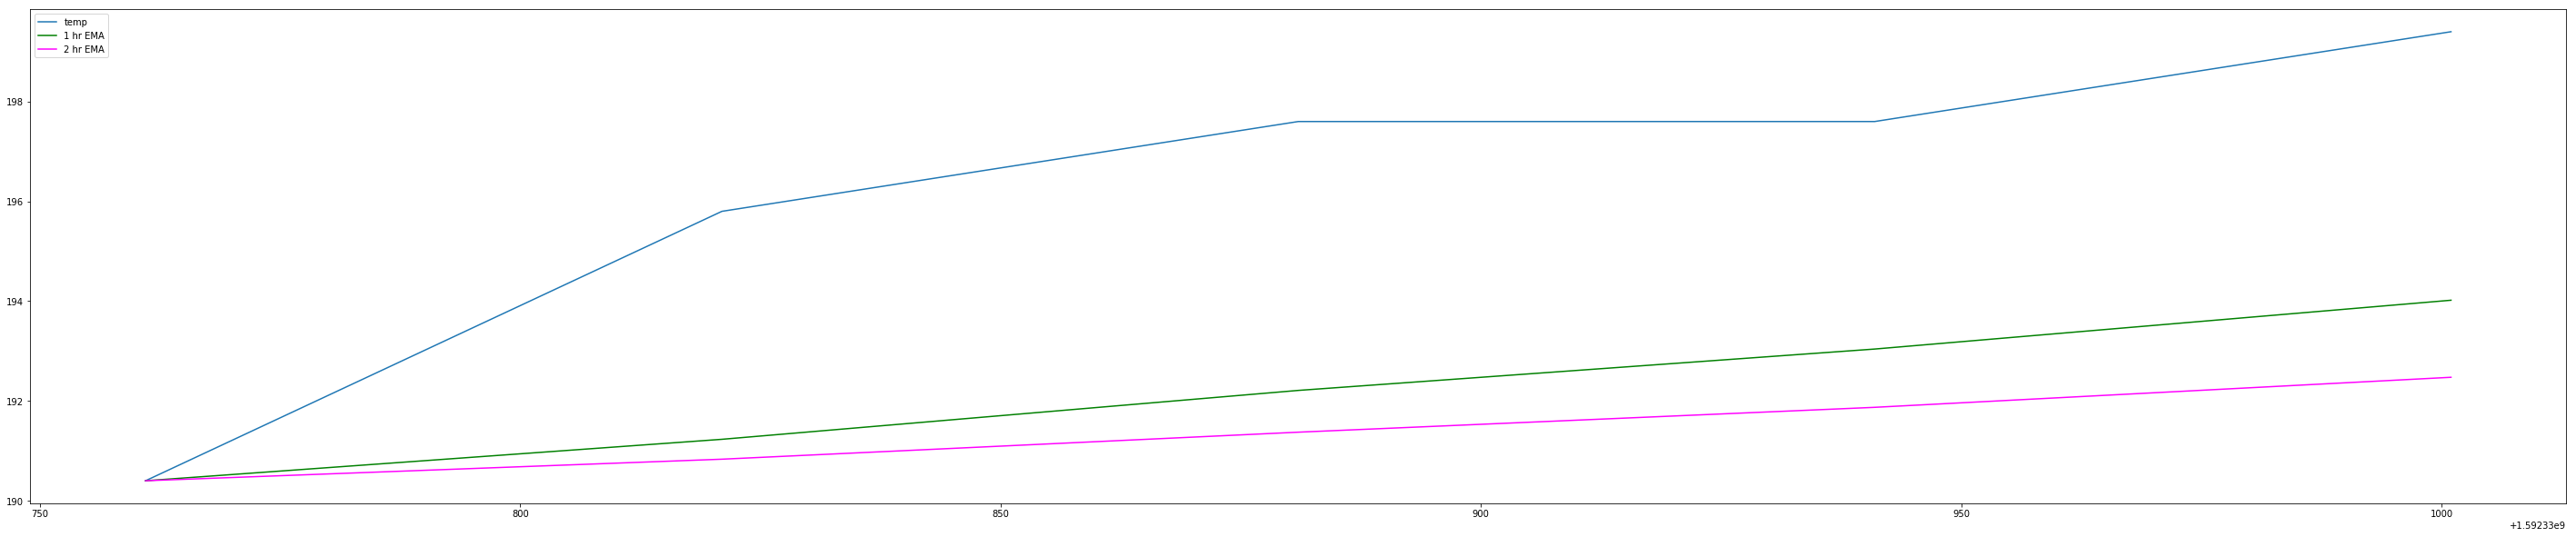

i : 16
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 203.0 
The median temperature is 203.0 
The mode temperature is 203.0 
The stdev temperature is 1.2727922061357937 
The max temperature is 204.8 
The min temperature is 201.2 


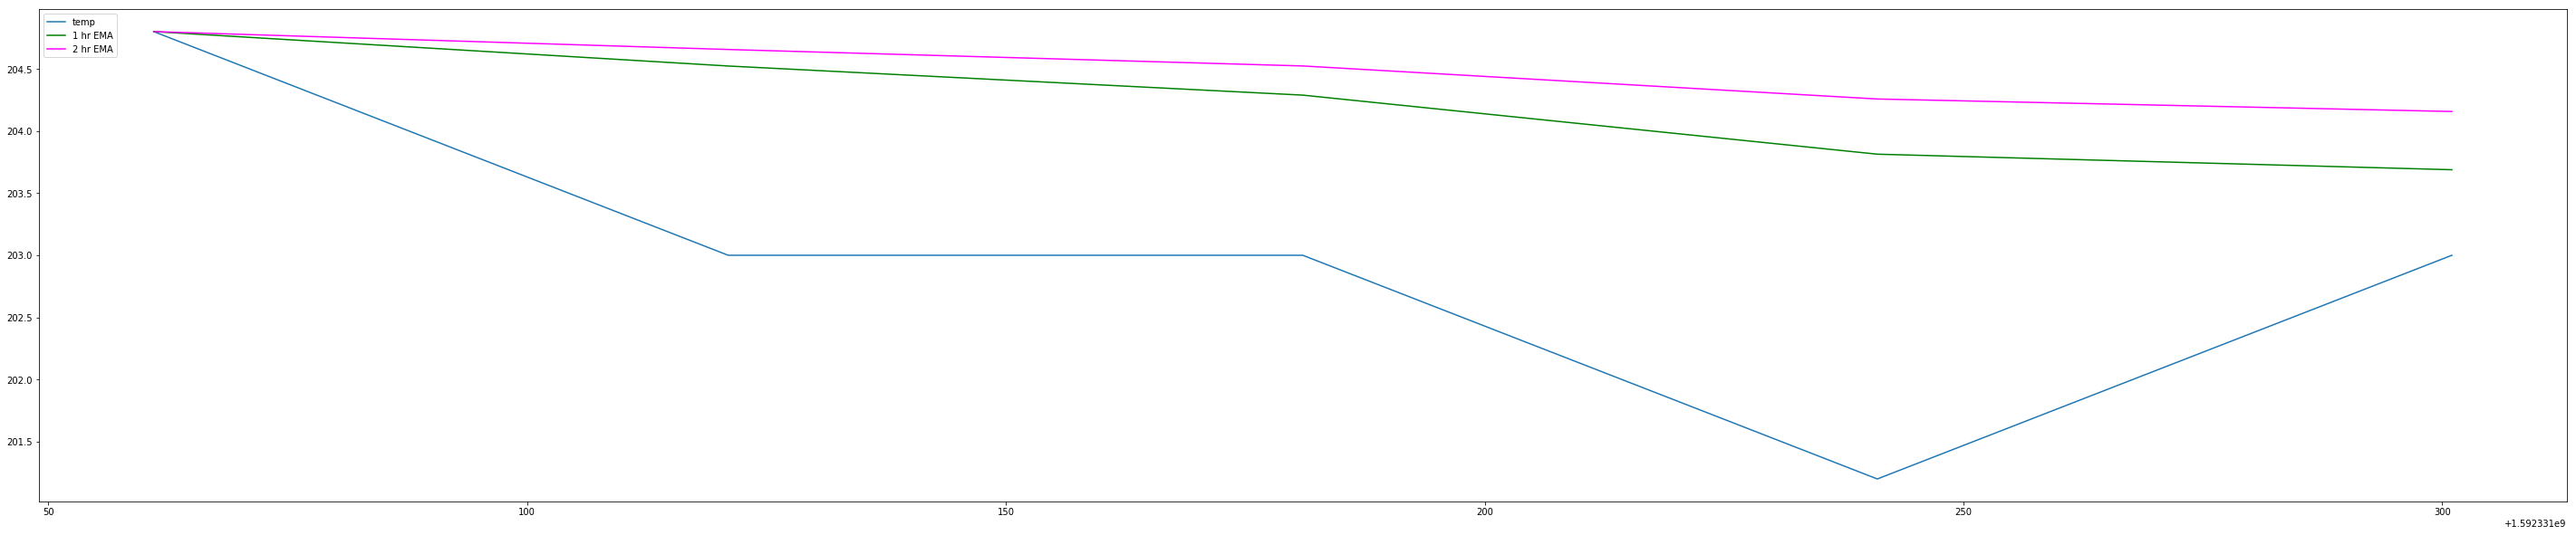

i : 21
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 202.64000000000001 
The median temperature is 206.6 
The mode temperature is 206.6 
The stdev temperature is 5.4596703197171115 
The max temperature is 206.6 
The min temperature is 195.8 


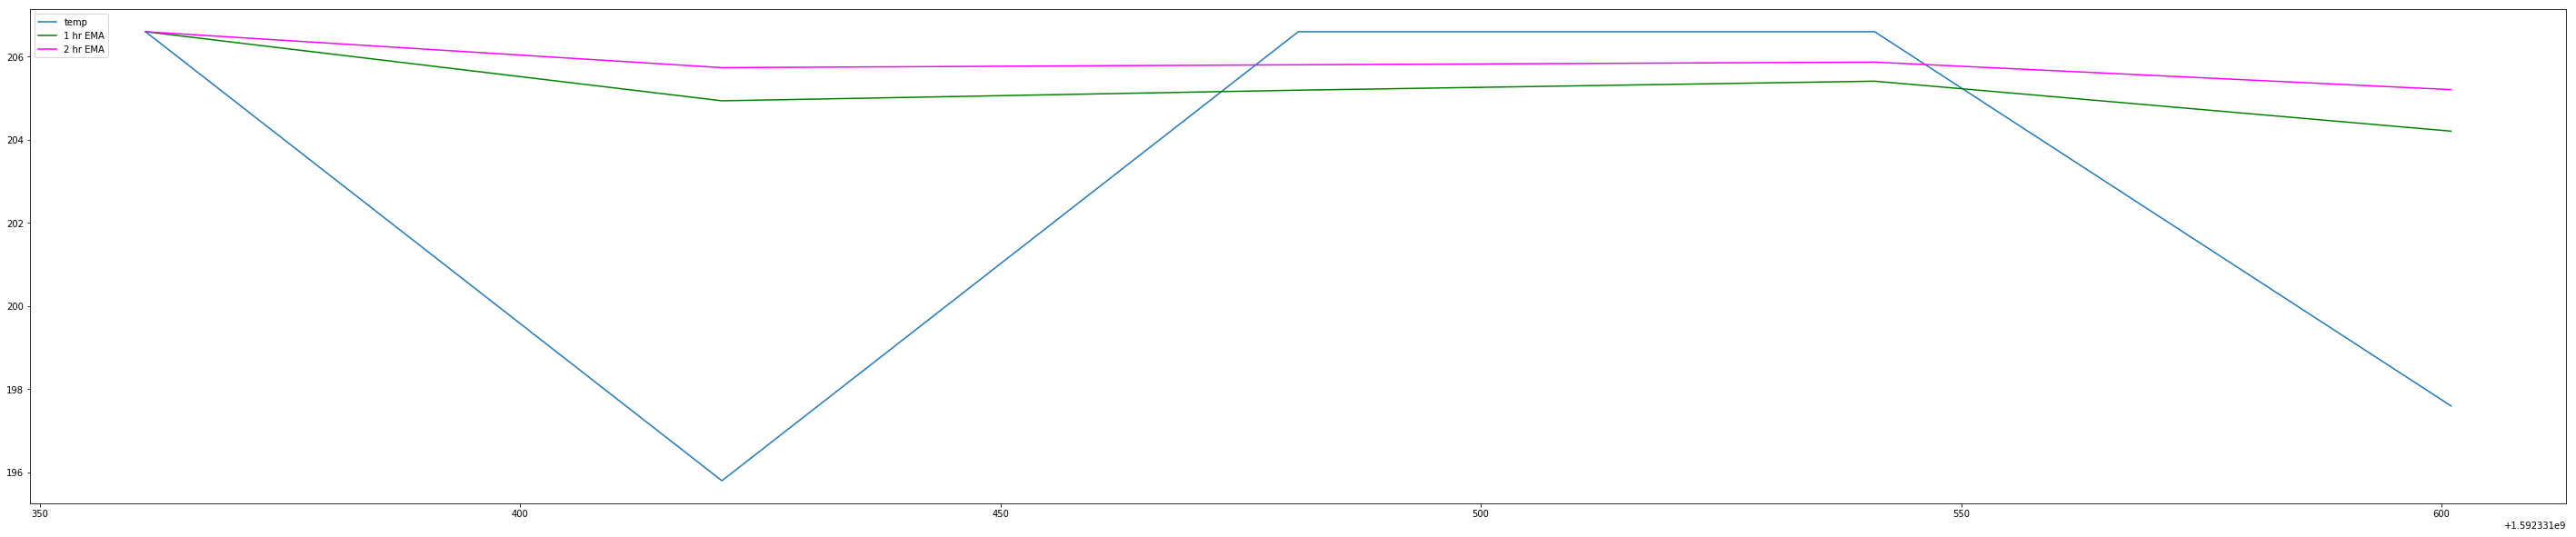

i : 26
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 208.04000000000002 
The median temperature is 208.4 
The mode temperature is 206.6 
The stdev temperature is 1.5059880477613354 
The max temperature is 210.2 
The min temperature is 206.6 


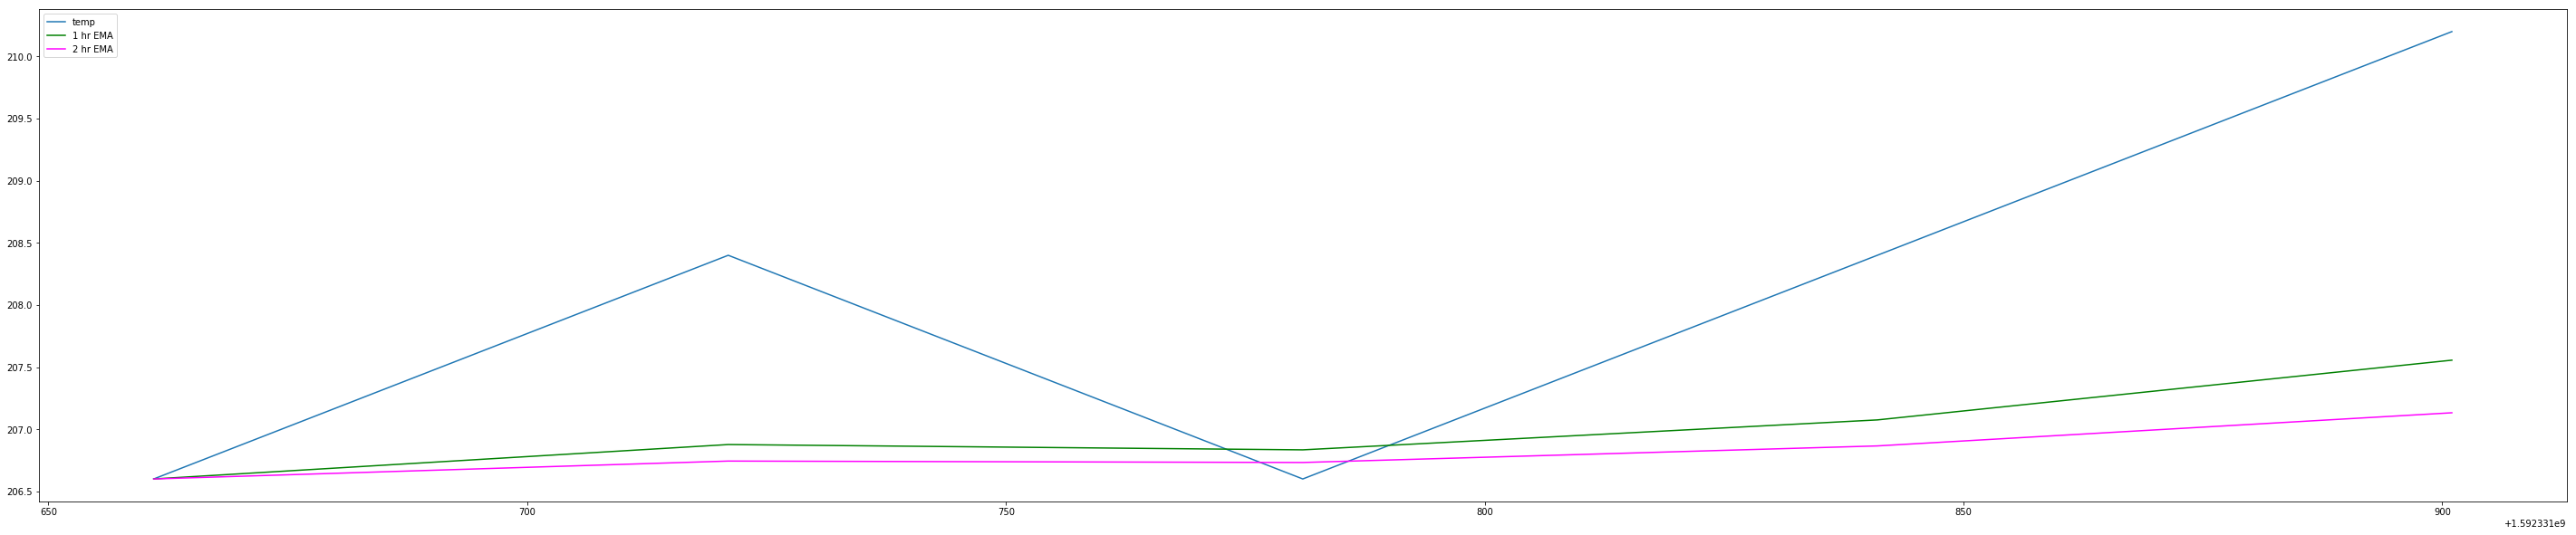

i : 31
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 210.92 
The median temperature is 210.2 
The mode temperature is 210.2 
The stdev temperature is 0.9859006035093052 
The max temperature is 212.0 
The min temperature is 210.2 


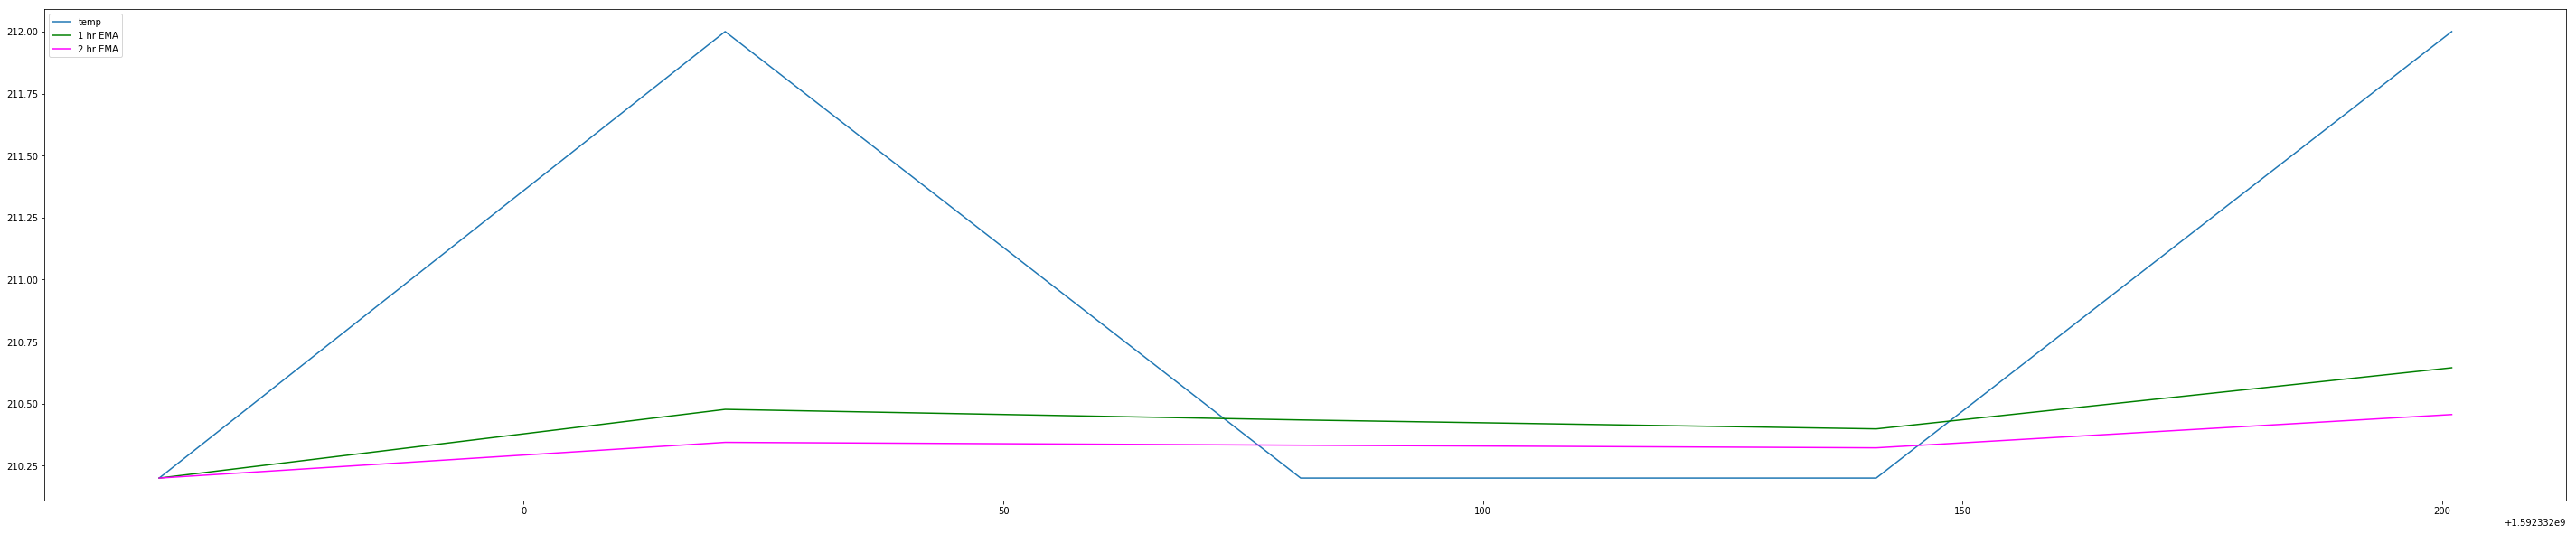

i : 36
Time slots CPU is under safe temperature 0 mins in 5 mins
The mean temperature is 211.28000000000003 
The median temperature is 212.0 
The mode temperature is 212.0 
The stdev temperature is 0.9859006035093052 
The max temperature is 212.0 
The min temperature is 210.2 


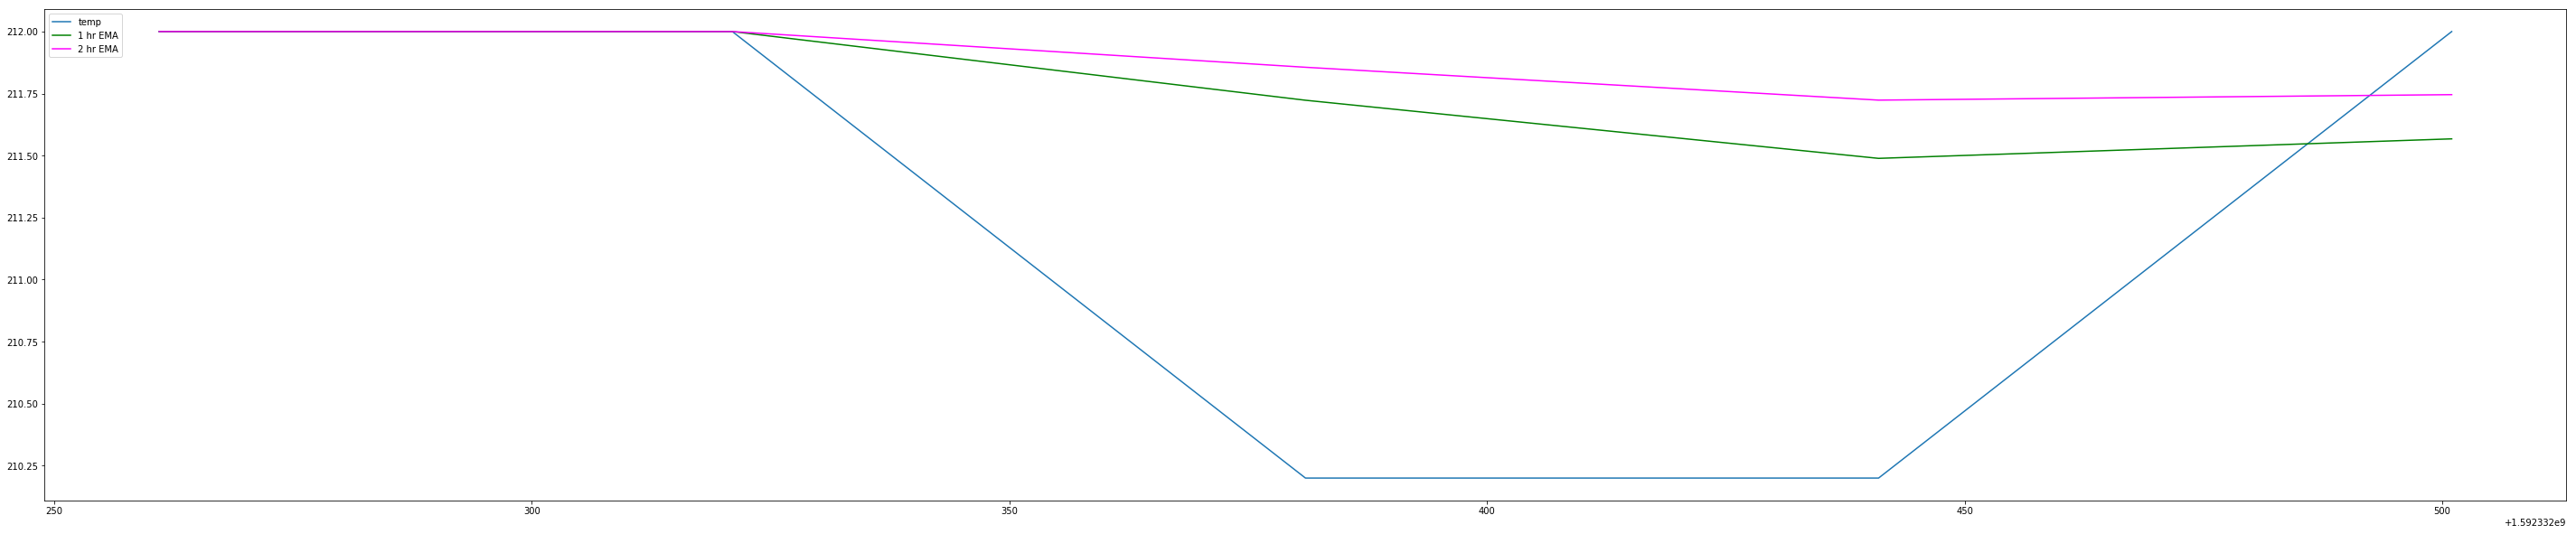

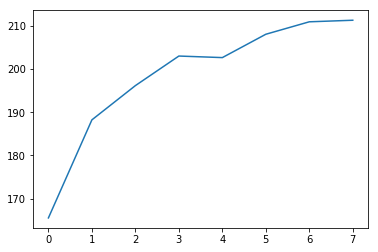

In [21]:
arr = []
for i in range(1, len(df_thread) - 1, 5):
    print ("i : " + str(i))
    df = df_thread[i : i + 5]
    analyze(df)
    arr.append(mean(df['temp']))
plt.plot(arr)